<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Sales_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data is obtained from the following link which can be accessed: https://github.com/ajeetth/ML_models/blob/e7eff485991ded0845e324c6e4ef83504212a8a3/Retail_Sales_Predictions/Data/Salesdata.csv

Data Understanding:


1.   Exploratory Data Analysis (EDA)

2.   Data Cleaning and Visualization

3.   Feature Engineering

4.   Data Preparation

5.   Feature Selection

6.   Model Training, Model Validation, and Testing (Regression Model)

7.   Evaluasi Model

8.   Review

In [ ]:
!pip install pyLDAvis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import datetime as dt
import pyLDAvis
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from scipy.stats import zscore


In [ ]:
df_sales = pd.read_csv('/content/Salesdata.csv')
df_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


**Exploratory Data Analysis (EDA) for SALES Dataset**



In [ ]:
df_sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_sales.describe(include='object').T

,count,unique,top,freq
Date,1017209,942,31-07-2015,1115
StateHoliday,1017209,5,0,855087


In [ ]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
# memeriksa nilai yang hilang

df_sales.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
df_sales_analisis = df_sales.copy()

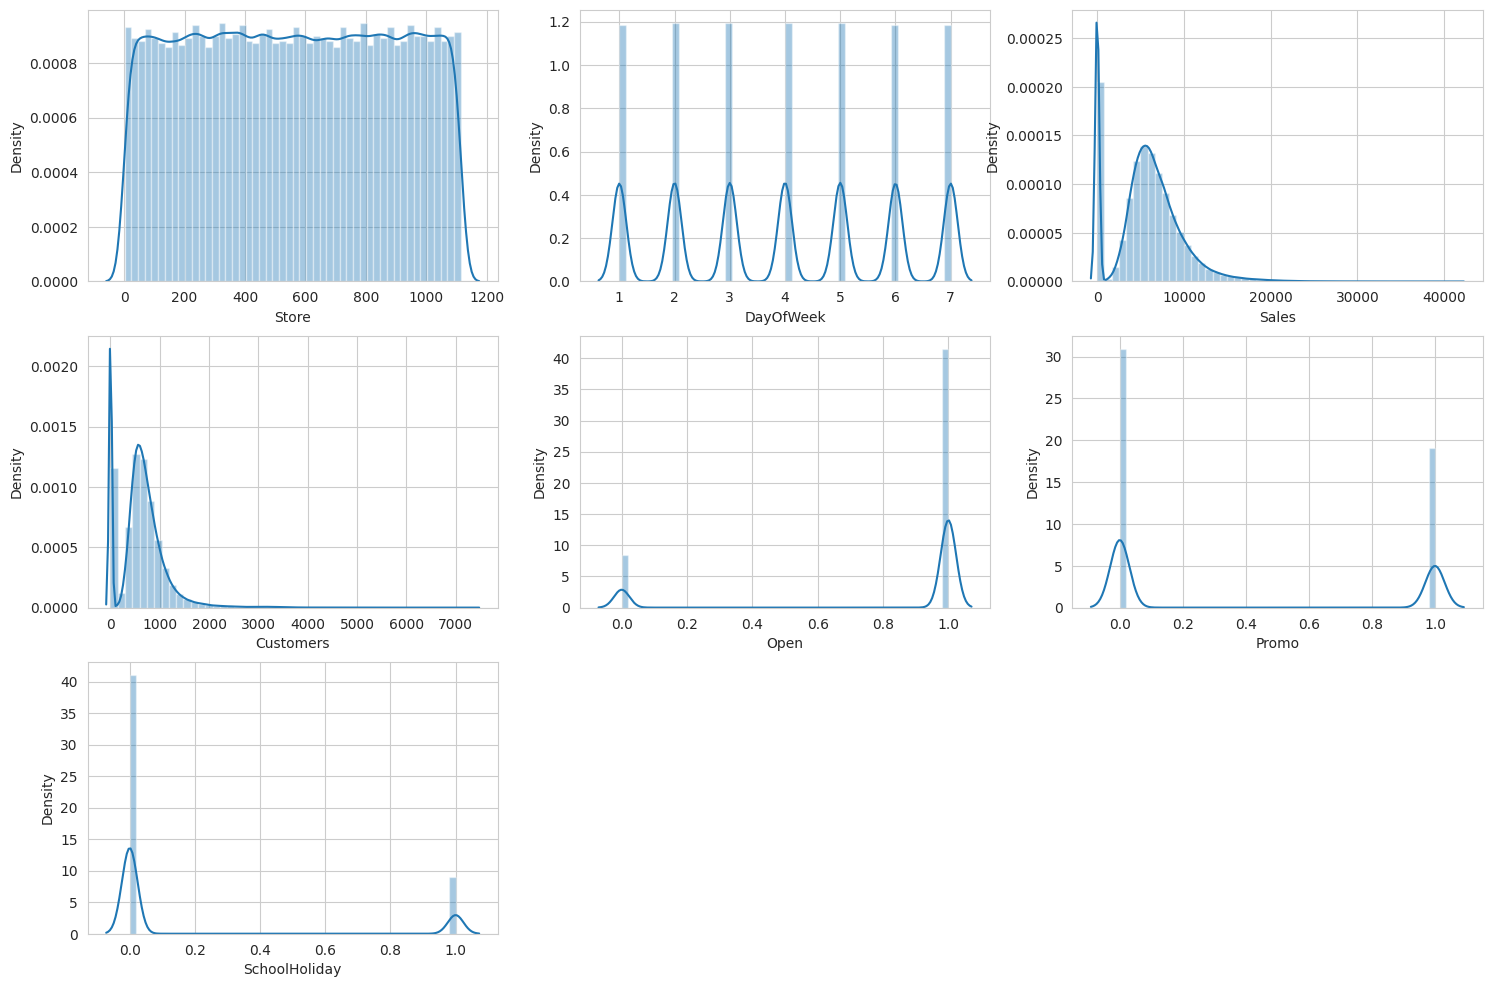

In [ ]:
plt.figure(figsize= (15, 7))

plt.subplot(331)
sns.distplot(df_sales_analisis['Store'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(332)
sns.distplot(df_sales_analisis['DayOfWeek'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(333)
sns.distplot(df_sales_analisis['Sales'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(334)
sns.distplot(df_sales_analisis['Customers'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(335)
sns.distplot(df_sales_analisis['Open'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(336)
sns.distplot(df_sales_analisis['Promo'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(337)
sns.distplot(df_sales_analisis['SchoolHoliday'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.show()

In [ ]:
df_sales_analisis['Open'].value_counts()

,count
Open,
1,844392
0,172817


In [ ]:
df_sales_analisis['Promo'].value_counts()

,count
Promo,
0,629129
1,388080


In [ ]:
df_sales_analisis['SchoolHoliday'].value_counts()

,count
SchoolHoliday,
0,835488
1,181721


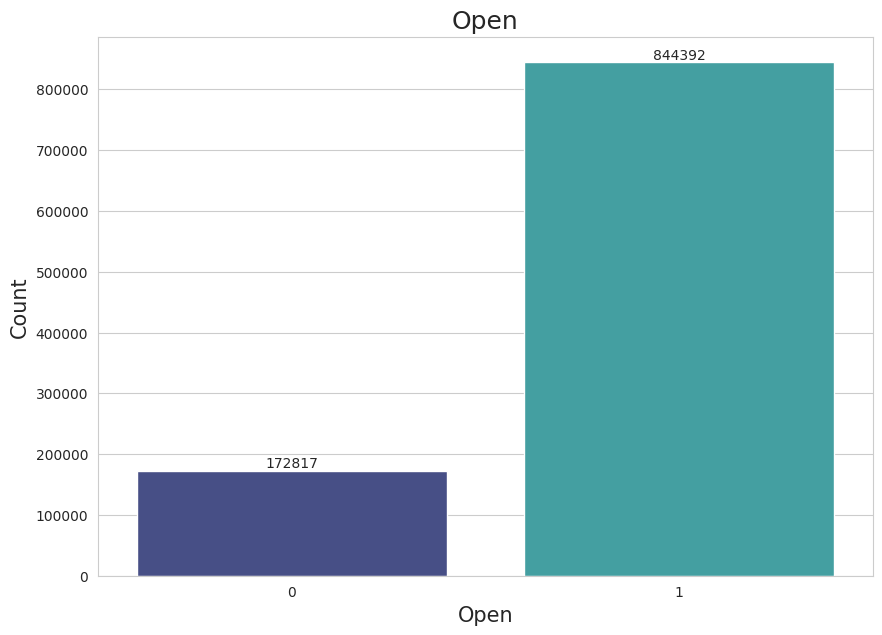

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df_sales_analisis,
                   x=df_sales_analisis.Open,
                   palette='mako',
                   saturation=0.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Open', fontsize=18)
plt.xlabel('Open', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

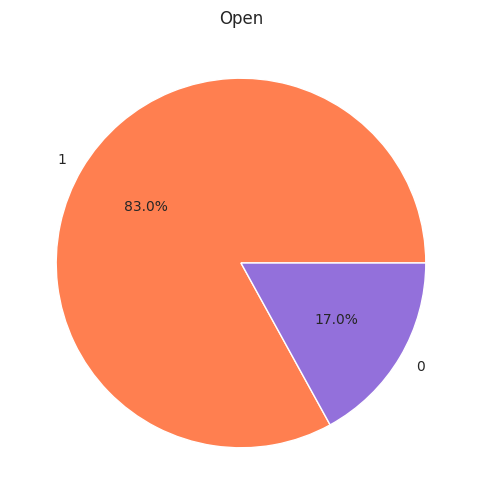

In [ ]:
plt.figure(figsize=(6,6))
open = df_sales_analisis['Open'].value_counts()
plt.pie(open,
        labels=open.index,
        autopct='%1.1f%%',
        colors=['coral','mediumpurple'])
plt.title('Open')
plt.show()

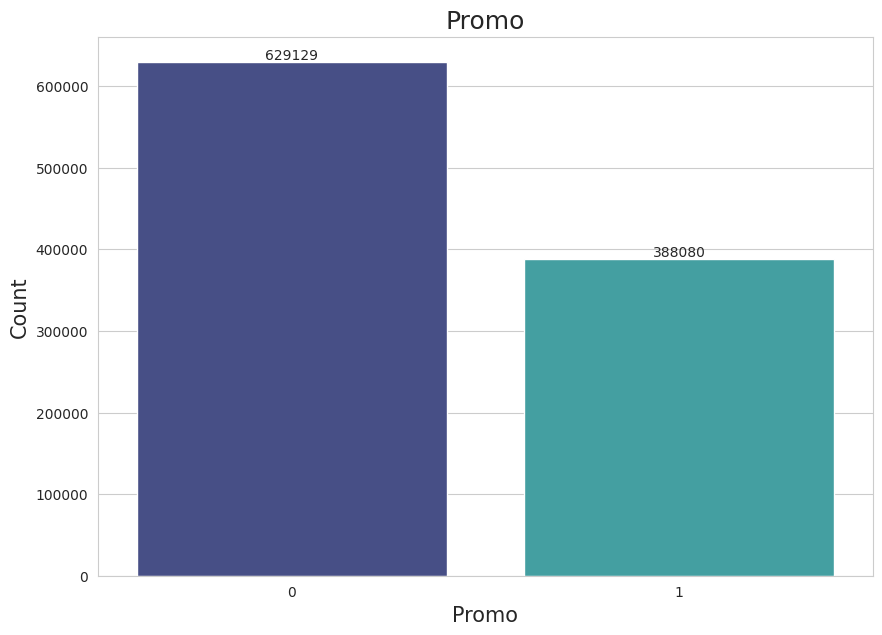

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df_sales_analisis,
                   x=df_sales_analisis.Promo,
                   palette='mako',
                   saturation=0.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Promo', fontsize=18)
plt.xlabel('Promo', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

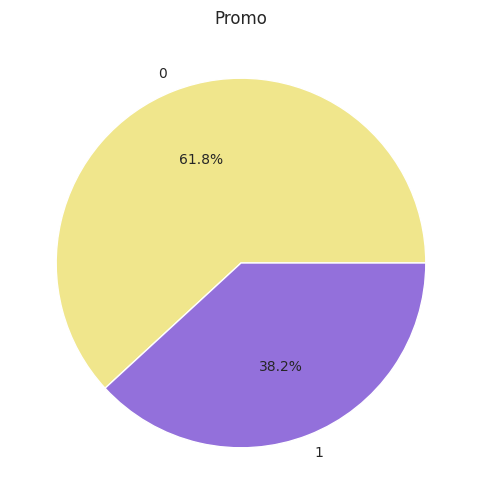

In [ ]:
plt.figure(figsize=(6,6))
prom = df_sales_analisis['Promo'].value_counts()
plt.pie(prom,
        labels=prom.index,
        autopct='%1.1f%%',
        colors=['khaki','mediumpurple'])
plt.title('Promo')
plt.show()

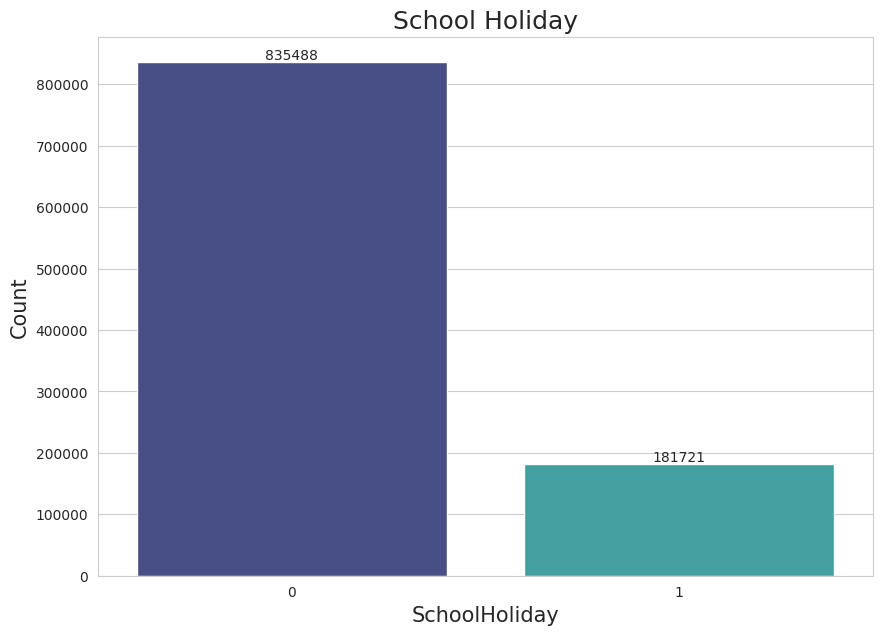

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df_sales_analisis,
                   x=df_sales_analisis.SchoolHoliday,
                   palette='mako',
                   saturation=0.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('School Holiday', fontsize=18)
plt.xlabel('SchoolHoliday', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

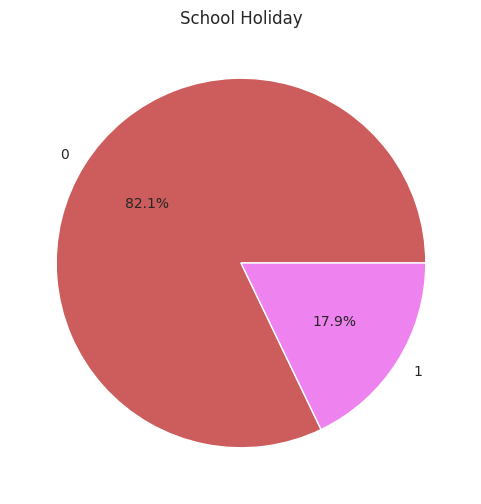

In [ ]:
plt.figure(figsize=(6,6))
libur_sekolah = df_sales_analisis['SchoolHoliday'].value_counts()
plt.pie(libur_sekolah,
        labels=libur_sekolah.index,
        autopct='%1.1f%%',
        colors=['indianred','violet'])
plt.title('School Holiday')
plt.show()

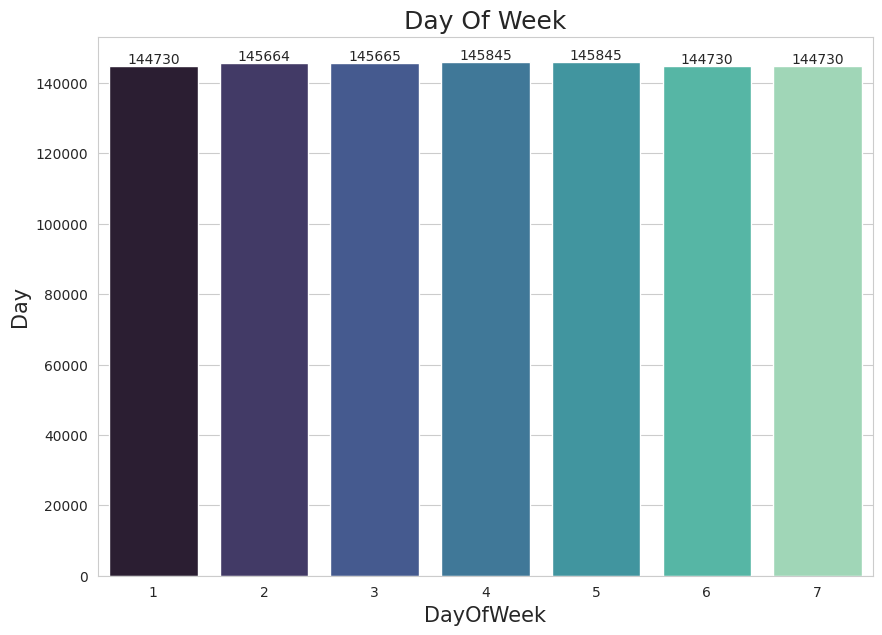

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df_sales_analisis,
                   x=df_sales_analisis.DayOfWeek,
                   palette='mako',
                   saturation=0.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Day Of Week', fontsize=18)
plt.xlabel('DayOfWeek', fontsize=15)
plt.ylabel('Day', fontsize=15)
plt.show()

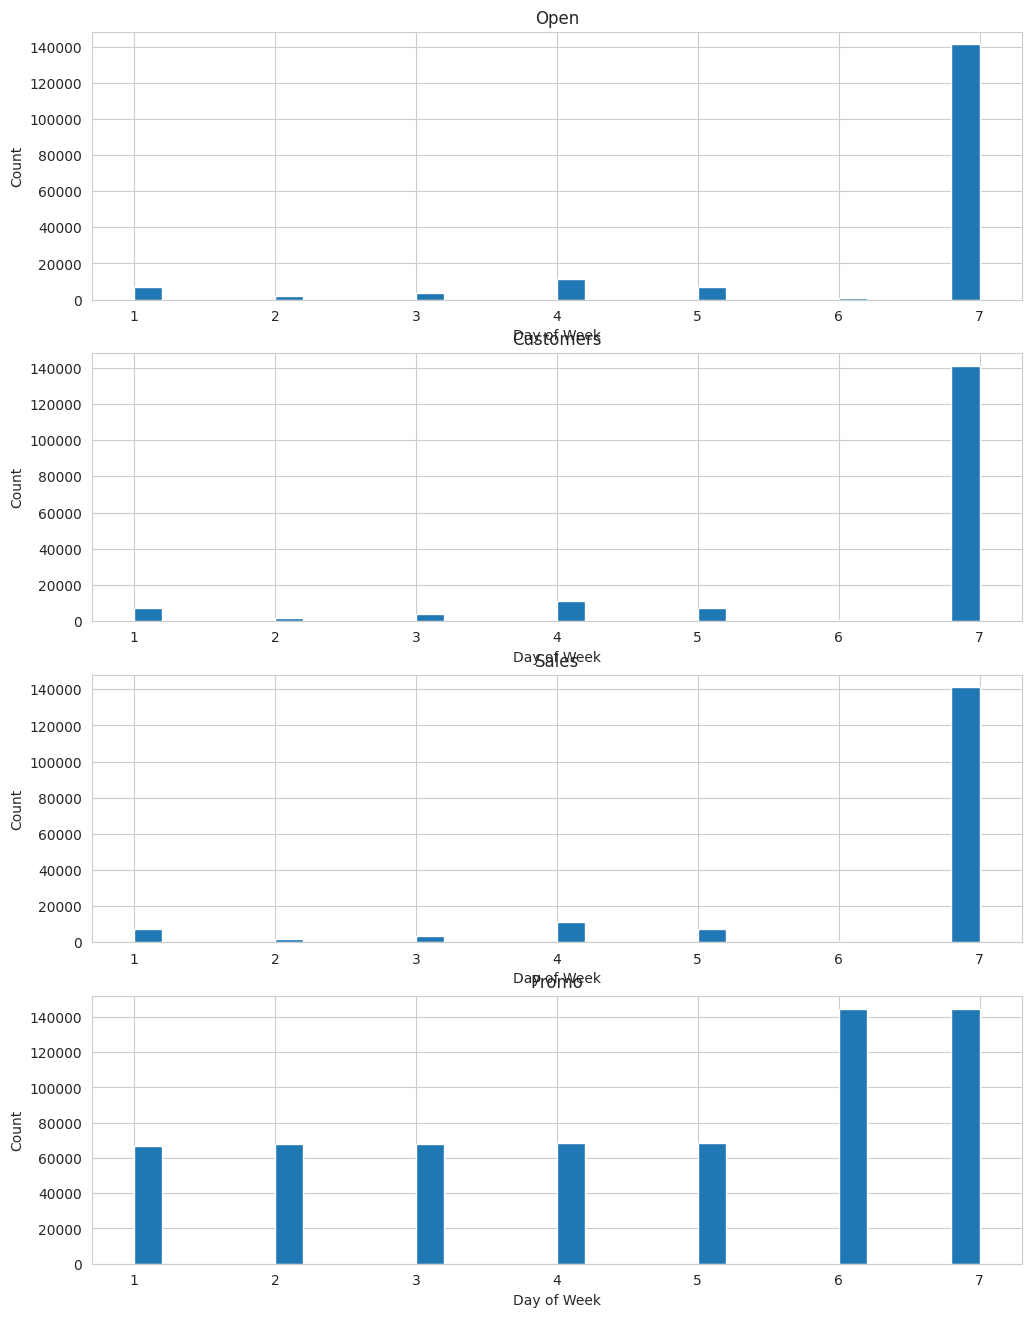

In [ ]:
fig, axes = plt.subplots(4,1, figsize=(12,16))
df_sales_analisis[df_sales_analisis['Open']== 0]['DayOfWeek'].hist(bins=30, ax=axes[0])
axes[0].set_title('Open')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Count')

df_sales_analisis[df_sales_analisis['Customers']== 0]['DayOfWeek'].hist(bins=30, ax=axes[1])
axes[1].set_title('Customers')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')

df_sales_analisis[df_sales_analisis['Sales']== 0]['DayOfWeek'].hist(bins=30, ax=axes[2])
axes[2].set_title('Sales')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Count')

df_sales_analisis[df_sales_analisis['Promo']== 0]['DayOfWeek'].hist(bins=30, ax=axes[3])
axes[3].set_title('Promo')
axes[3].set_xlabel('Day of Week')
axes[3].set_ylabel('Count')
plt.show()

**Sales Over Years**

In [ ]:
df_sales_analisis['Date'] = pd.to_datetime(df_sales_analisis['Date'])
df_sales_analisis['Years'] = df_sales_analisis['Date'].dt.year
df_sales_analisis['Month'] = df_sales_analisis['Date'].dt.month
df_sales_analisis['Week'] = df_sales_analisis['Date'].dt.weekday

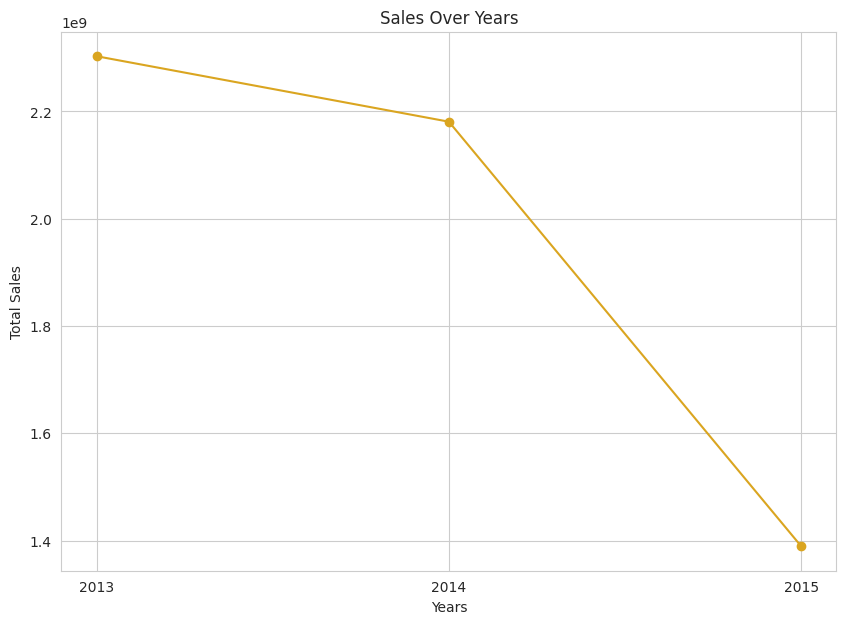

In [ ]:
df_sales_analisis_year_sales = df_sales_analisis.groupby('Years')['Sales'].sum().reset_index()

plt.figure(figsize=(10,7))
plt.plot(df_sales_analisis_year_sales['Years'],
         df_sales_analisis_year_sales['Sales'],
         marker='o',
         color='goldenrod')
plt.title('Sales Over Years')
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(df_sales_analisis_year_sales['Years'])
plt.show()

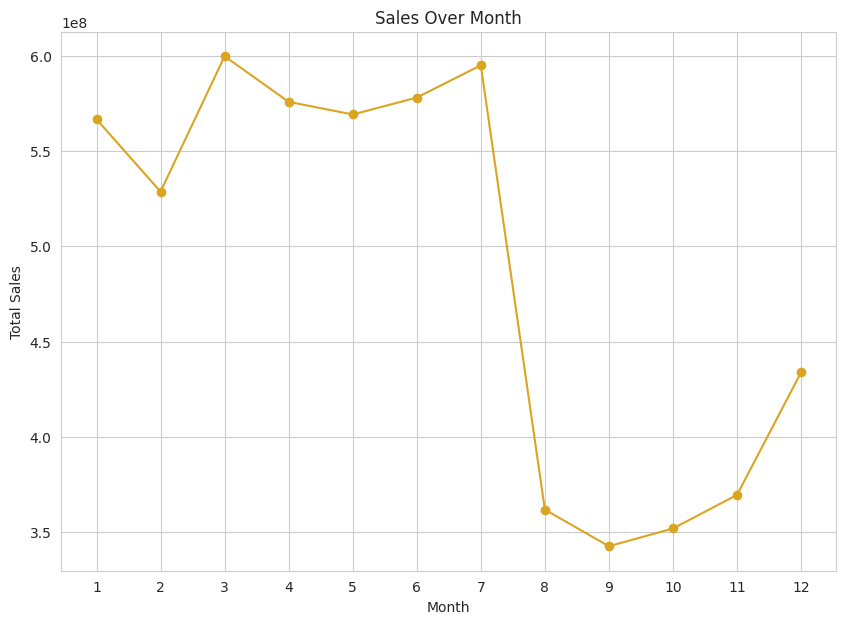

In [ ]:
df_sales_analisis_month_sales = df_sales_analisis.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10,7))
plt.plot(df_sales_analisis_month_sales['Month'],
         df_sales_analisis_month_sales['Sales'],
         marker='o',
         color='goldenrod')
plt.title('Sales Over Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(df_sales_analisis_month_sales['Month'])
plt.show()

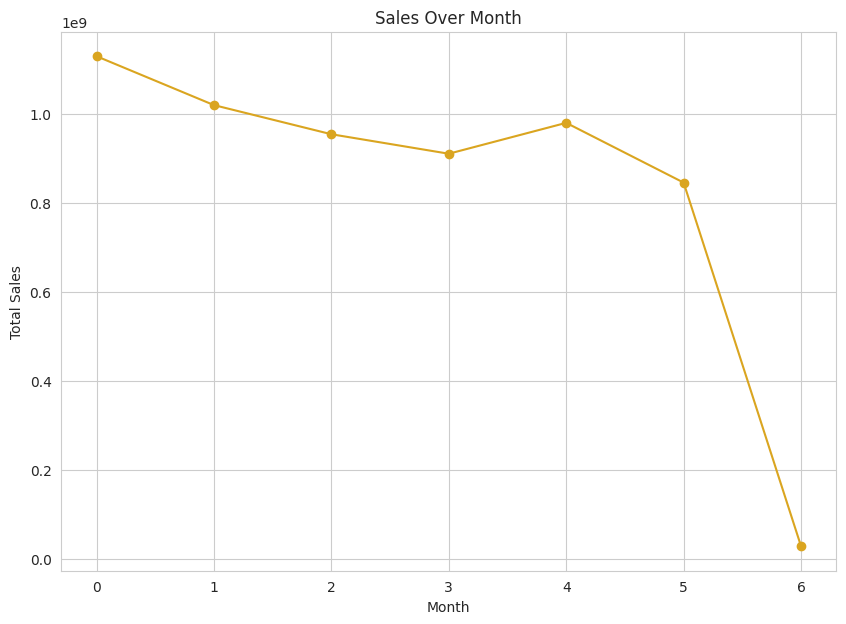

In [ ]:
df_sales_analisis_week_sales = df_sales_analisis.groupby('Week')['Sales'].sum().reset_index()

plt.figure(figsize=(10,7))
plt.plot(df_sales_analisis_week_sales['Week'],
         df_sales_analisis_week_sales['Sales'],
         marker='o',
         color='goldenrod')
plt.title('Sales Over Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(df_sales_analisis_week_sales['Week'])
plt.show()

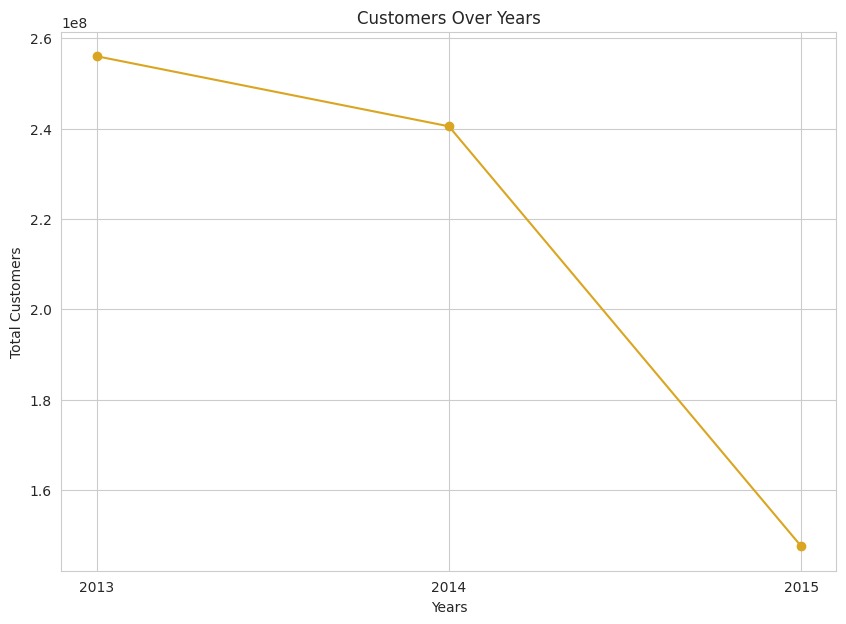

In [ ]:
df_sales_analisis_year_customers = df_sales_analisis.groupby('Years')['Customers'].sum().reset_index()

plt.figure(figsize=(10,7))
plt.plot(df_sales_analisis_year_customers['Years'],
         df_sales_analisis_year_customers['Customers'],
         marker='o',
         color='goldenrod')
plt.title('Customers Over Years')
plt.xlabel('Years')
plt.ylabel('Total Customers')
plt.grid(True)
plt.xticks(df_sales_analisis_year_customers['Years'])
plt.show()

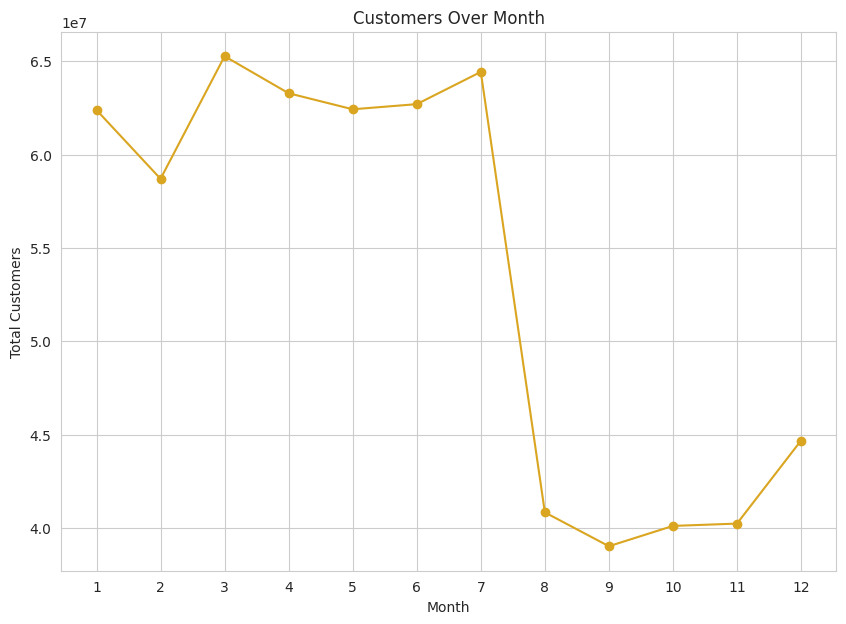

In [ ]:
df_sales_analisis_year_customers = df_sales_analisis.groupby('Month')['Customers'].sum().reset_index()

plt.figure(figsize=(10,7))
plt.plot(df_sales_analisis_year_customers['Month'],
         df_sales_analisis_year_customers['Customers'],
         marker='o',
         color='goldenrod')
plt.title('Customers Over Month')
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.grid(True)
plt.xticks(df_sales_analisis_year_customers['Month'])
plt.show()

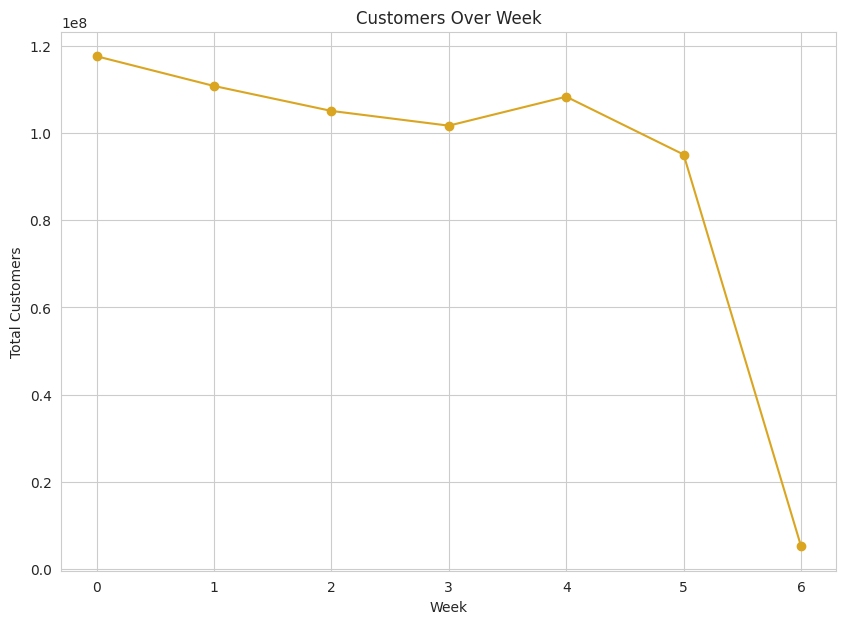

In [ ]:
df_sales_analisis_year_customers = df_sales_analisis.groupby('Week')['Customers'].sum().reset_index()

plt.figure(figsize=(10,7))
plt.plot(df_sales_analisis_year_customers['Week'],
         df_sales_analisis_year_customers['Customers'],
         marker='o',
         color='goldenrod')
plt.title('Customers Over Week')
plt.xlabel('Week')
plt.ylabel('Total Customers')
plt.grid(True)
plt.xticks(df_sales_analisis_year_customers['Week'])
plt.show()

In [ ]:
df_sales_analisis['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

* 0: Tidak ada
* a: Hari Libur publik
* b: Hari Libur Paskah
* c: Hari Libur Natal

In [ ]:
df_sales_analisis['StateHoliday'] = df_sales_analisis['StateHoliday'].replace(0, '0')

In [ ]:
df_sales_analisis['StateHoliday'].value_counts()

,count
StateHoliday,
0,986159
a,20260
b,6690
c,4100


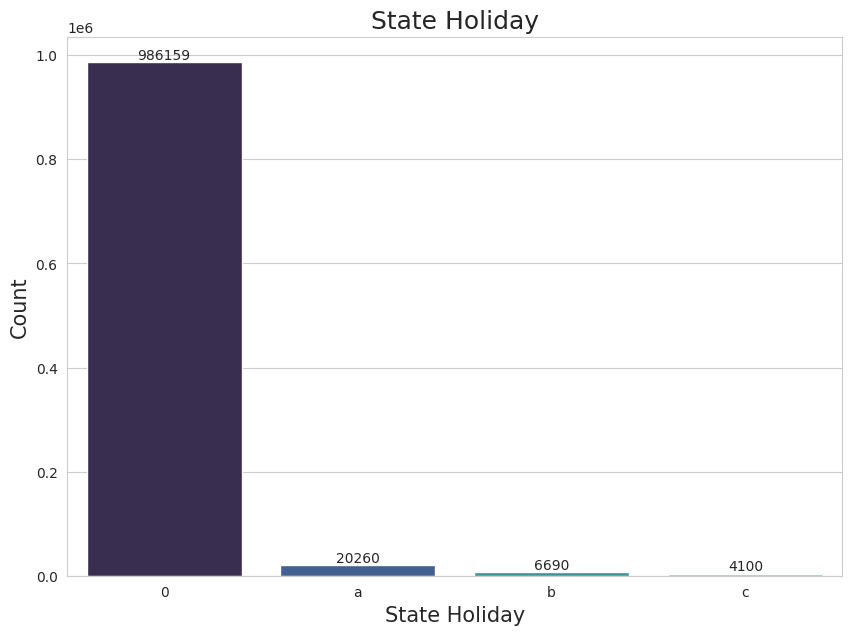

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df_sales_analisis,
                   x=df_sales_analisis.StateHoliday,
                   palette='mako',
                   saturation=0.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('State Holiday', fontsize=18)
plt.xlabel('State Holiday', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

**Identify Outliers Analysis**

**DISTRIBUTION SALES**

# Bagian Baru

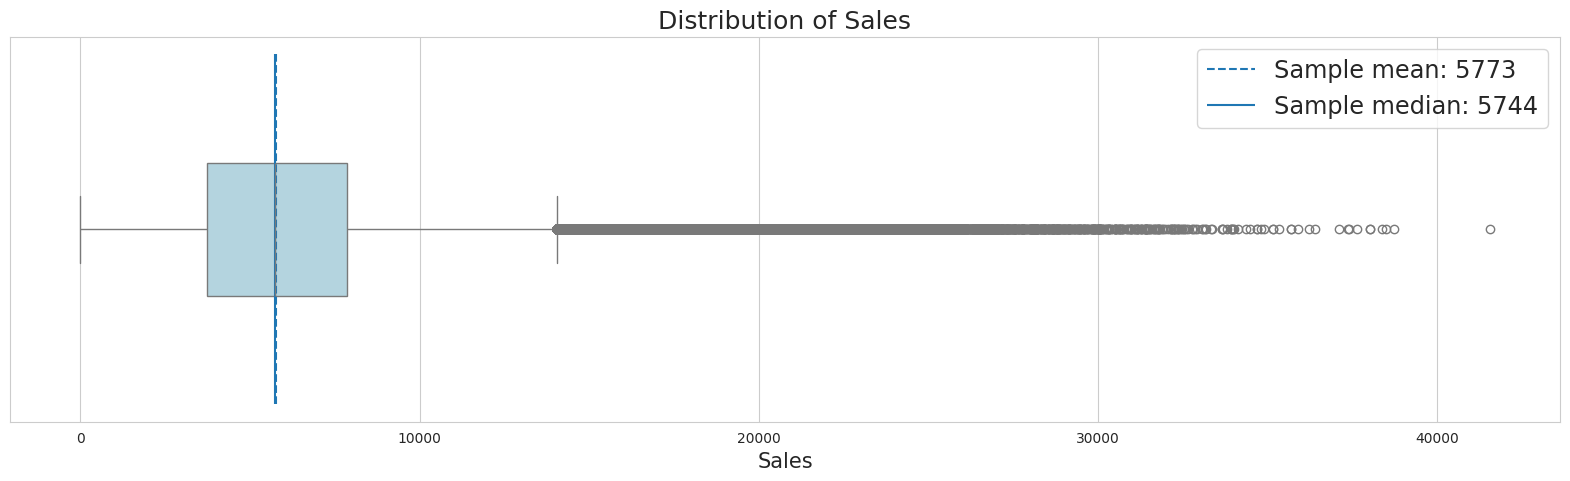

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=df_sales_analisis,
                 x='Sales',
                 color='#ADD8E6',
                 showfliers=True,
                 showbox=True,
                 whis=1.5)
sample_median = int(df_sales_analisis.Sales.median())
sample_mean = int(df_sales_analisis.Sales.mean())
plt.xlabel('Sales',
           fontdict={'size':15})
plt.vlines(x=sample_mean,
           ymin=-1.05,
           ymax=1.05,
           linestyles='dashed',
           label=f'Sample mean: {sample_mean}')
plt.vlines(x=sample_median,
           ymin=-1.05,
           ymax=1.05,
           linestyles='solid',
           label=f'Sample median: {sample_median}')
plt.title(f'Distribution of Sales',
          fontdict={'size':18})
plt.legend(fontsize='xx-large',
           loc='upper right')
plt.show()

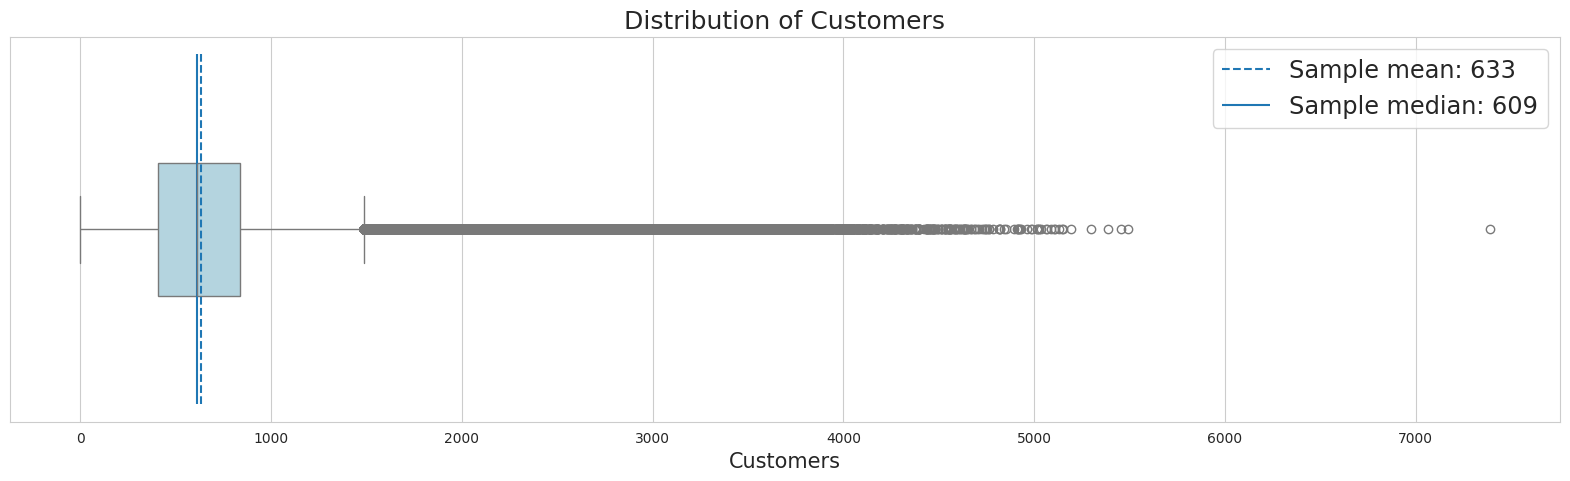

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=df_sales_analisis,
                 x='Customers',
                 color='#ADD8E6',
                 showfliers=True,
                 showbox=True,
                 whis=1.5)
sample_median = int(df_sales_analisis.Customers.median())
sample_mean = int(df_sales_analisis.Customers.mean())
plt.xlabel('Customers',
           fontdict={'size':15})
plt.vlines(x=sample_mean,
           ymin=-1.05,
           ymax=1.05,
           linestyles='dashed',
           label=f'Sample mean: {sample_mean}')
plt.vlines(x=sample_median,
           ymin=-1.05,
           ymax=1.05,
           linestyles='solid',
           label=f'Sample median: {sample_median}')
plt.title(f'Distribution of Customers',
          fontdict={'size':18})
plt.legend(fontsize='xx-large',
           loc='upper right')
plt.show()

**HANDLING OUTLIERS**

In [ ]:
def remove_outliers(col, data):
  outlier_col = col + '_outliers'
  data[outlier_col] = data[col]
  data[outlier_col] = zscore(data[outlier_col])
  condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
  print(data[condition].shape)
  data.drop(data[condition].index, axis=0, inplace=True)
  data.drop(outlier_col, axis=1, inplace=True)
remove_outliers('Sales', df_sales_analisis)

(9731, 13)


In [ ]:
remove_outliers('Customers', df_sales_analisis)

(10501, 13)


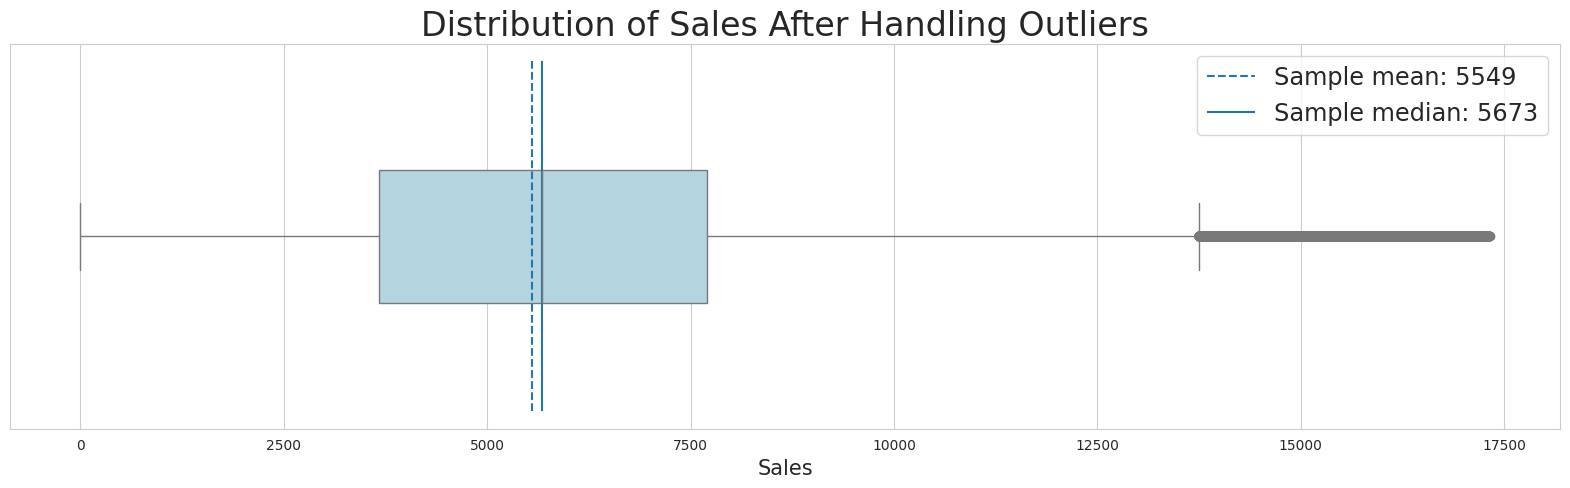

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=df_sales_analisis,
                 x='Sales',
                 color='#ADD8E6',
                 showfliers=True,
                 showbox=True,
                 whis=1.5)
sample_median = int(df_sales_analisis.Sales.median())
sample_mean = int(df_sales_analisis.Sales.mean())
plt.xlabel('Sales',
           fontdict={'size':15})
plt.vlines(x=sample_mean,
           ymin=-1.05,
           ymax=1.05,
           linestyles='dashed',
           label=f'Sample mean: {sample_mean}')
plt.vlines(x=sample_median,
           ymin=-1.05,
           ymax=1.05,
           linestyles='solid',
           label=f'Sample median: {sample_median}')
plt.title(f'Distribution of Sales After Handling Outliers',
          fontdict={'size':24})
plt.legend(fontsize='xx-large',
           loc='upper right')
plt.show()

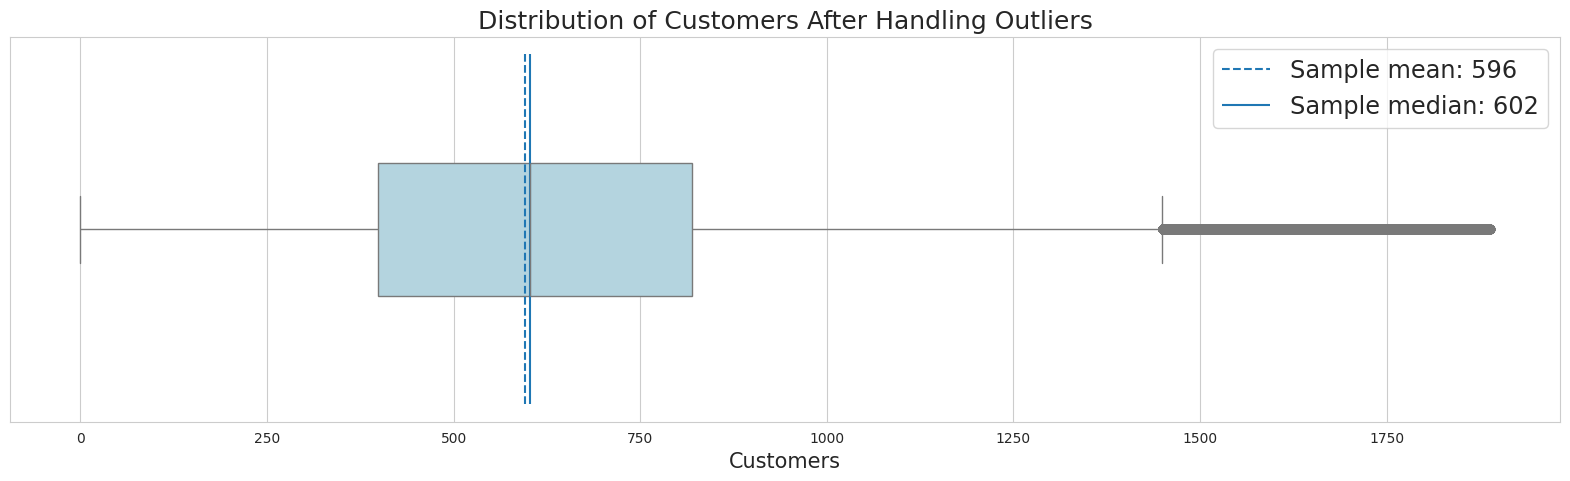

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=df_sales_analisis,
                 x='Customers',
                 color='#ADD8E6',
                 showfliers=True,
                 showbox=True,
                 whis=1.5)
sample_median = int(df_sales_analisis.Customers.median())
sample_mean = int(df_sales_analisis.Customers.mean())
plt.xlabel('Customers',
           fontdict={'size':15})
plt.vlines(x=sample_mean,
           ymin=-1.05,
           ymax=1.05,
           linestyles='dashed',
           label=f'Sample mean: {sample_mean}')
plt.vlines(x=sample_median,
           ymin=-1.05,
           ymax=1.05,
           linestyles='solid',
           label=f'Sample median: {sample_median}')
plt.title(f'Distribution of Customers After Handling Outliers',
          fontdict={'size':18})
plt.legend(fontsize='xx-large',
           loc='upper right')
plt.show()

In [ ]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':df_sales_analisis.Sales.skew(),
        'Customers':df_sales_analisis.Customers.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
Sales,0.10212
Customers,0.22518


In [ ]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':df_sales_analisis.Sales.skew(),
        'Customers':df_sales_analisis.Customers.skew()
    }), orient='index', columns=['Skewness After Handling Outliers'])

,Skewness After Handling Outliers
Sales,0.10212
Customers,0.22518


**Exploratory Data Analysis (EDA) for STORE Dataset**

In [ ]:
df_store = pd.read_csv('/content/store.csv')
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df_store.describe(include='object').T

,count,unique,top,freq
StoreType,1115,4,a,602
Assortment,1115,3,a,593
PromoInterval,571,3,"Jan,Apr,Jul,Oct",335


In [ ]:
df_store.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [ ]:
# memeriksa nilai yang hilang

df_store.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


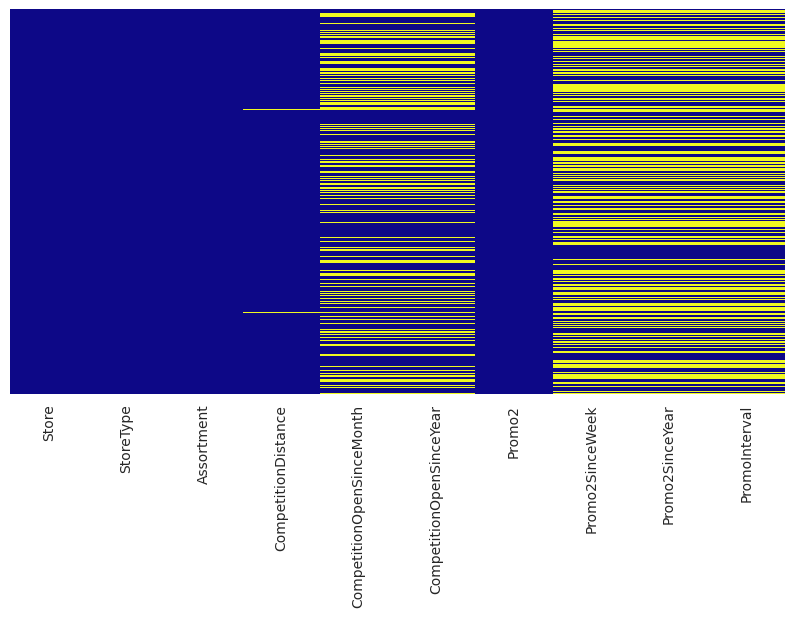

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_store.isnull(),
            cbar=False,
            cmap='plasma',
            yticklabels=False)
plt.show()

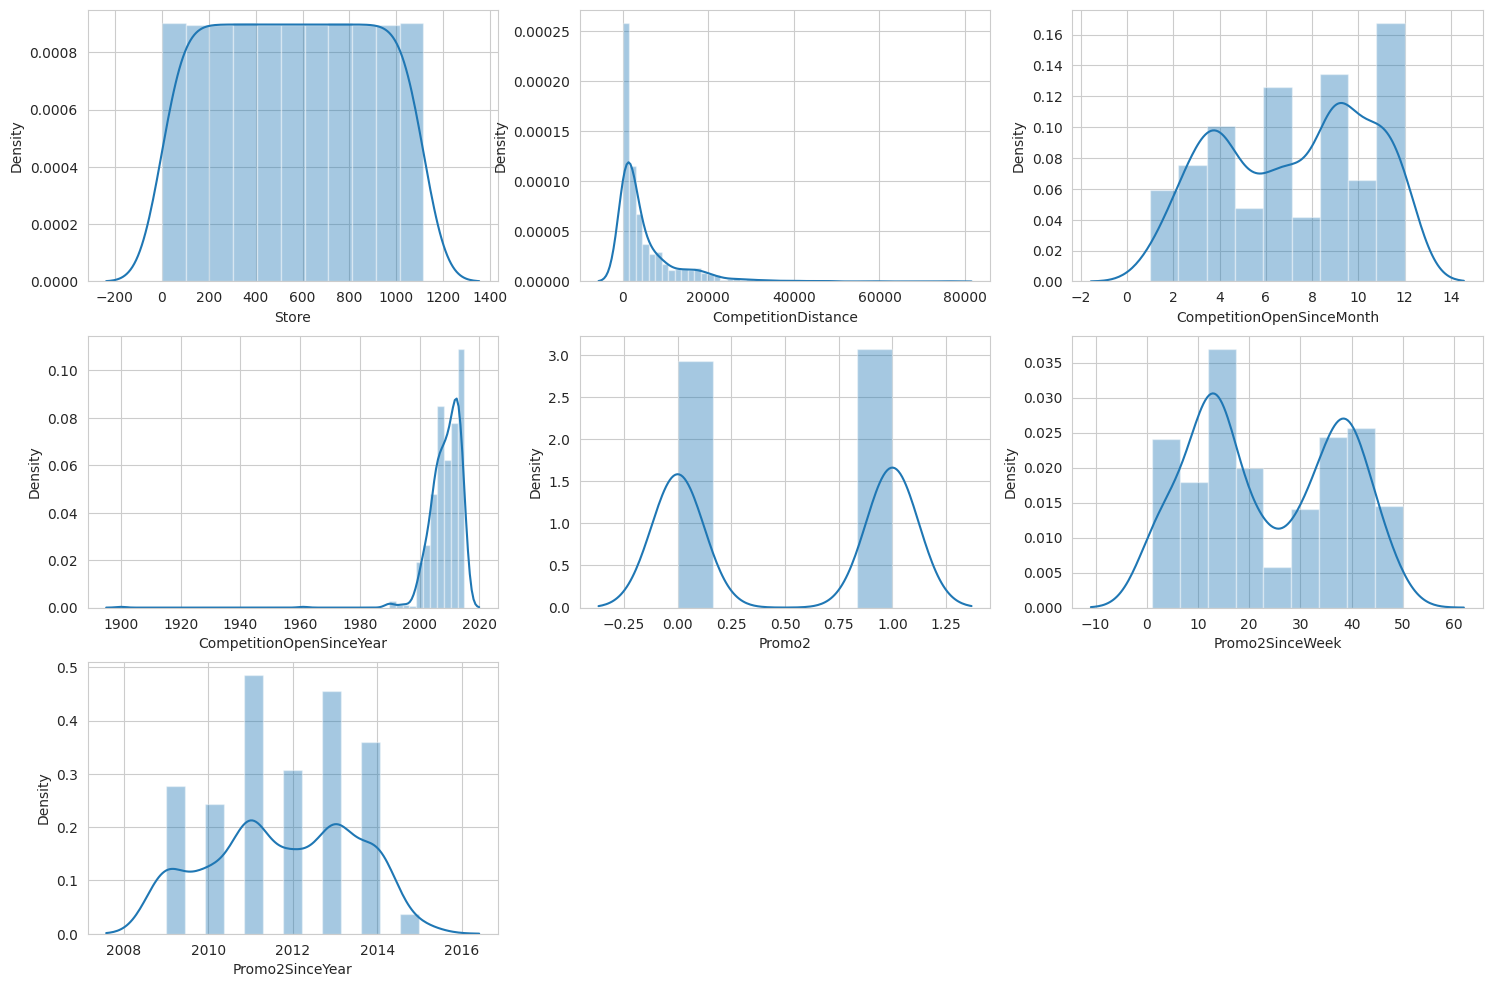

In [ ]:
plt.figure(figsize= (15, 7))

plt.subplot(331)
sns.distplot(df_store['Store'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(332)
sns.distplot(df_store['CompetitionDistance'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(333)
sns.distplot(df_store['CompetitionOpenSinceMonth'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(334)
sns.distplot(df_store['CompetitionOpenSinceYear'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(335)
sns.distplot(df_store['Promo2'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(336)
sns.distplot(df_store['Promo2SinceWeek'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(337)
sns.distplot(df_store['Promo2SinceYear'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.show()

In [ ]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
df_store_analisis = df_store.copy()

**Data Cleaning**

In [ ]:
df_store_analisis = df_store.copy()

In [ ]:
df_store_analisis['CompetitionDistance'].fillna(df_store_analisis['CompetitionDistance'].median(), inplace=True)
df_store_analisis['Promo2SinceWeek'].fillna(df_store_analisis['Promo2SinceWeek'].median(), inplace=True)
df_store_analisis['Promo2SinceYear'].fillna(df_store_analisis['Promo2SinceYear'].median(), inplace=True)
df_store_analisis['PromoInterval'].fillna('NoPromo', inplace=True)
df_store_analisis['CompetitionOpenSinceMonth'].fillna(df_store_analisis['CompetitionOpenSinceMonth'].median(), inplace=True)
df_store_analisis['CompetitionOpenSinceYear'].fillna(df_store_analisis['CompetitionOpenSinceYear'].median(), inplace=True)

In [ ]:
# memeriksa nilai yang hilang

df_store_analisis.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


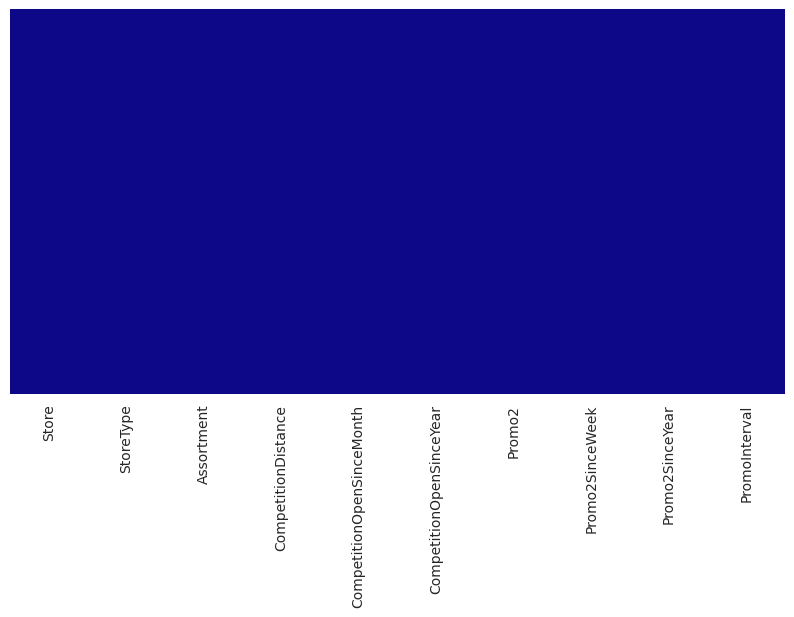

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_store_analisis.isnull(),
            cbar=False,
            cmap='plasma',
            yticklabels=False)
plt.show()

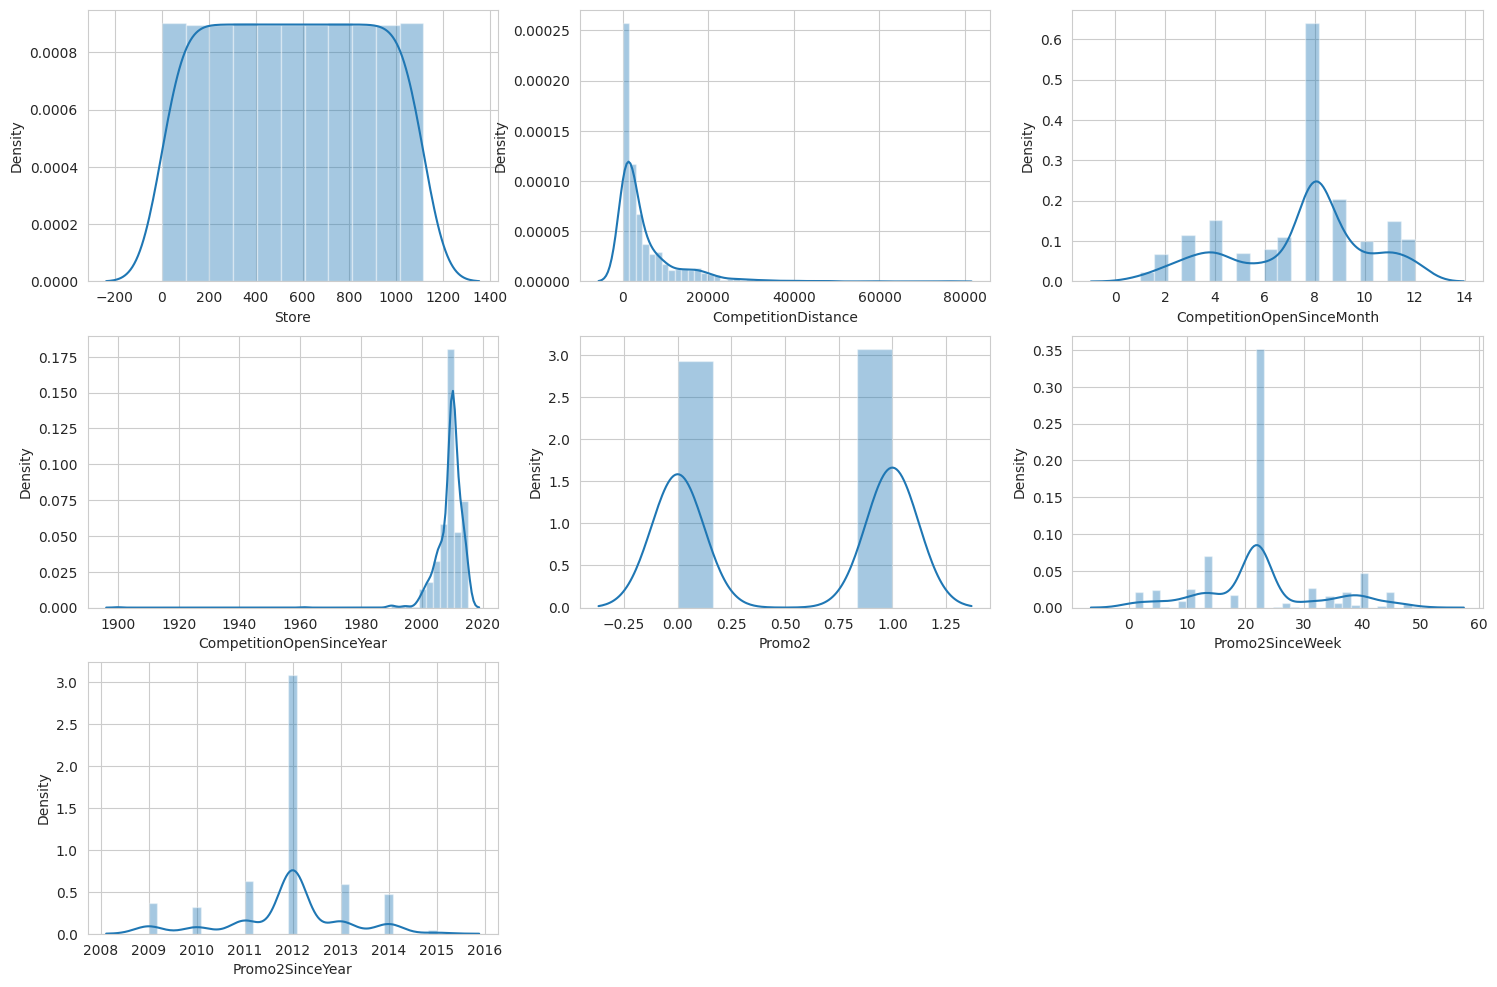

In [ ]:
plt.figure(figsize= (15, 7))

plt.subplot(331)
sns.distplot(df_store_analisis['Store'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(332)
sns.distplot(df_store_analisis['CompetitionDistance'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(333)
sns.distplot(df_store_analisis['CompetitionOpenSinceMonth'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(334)
sns.distplot(df_store_analisis['CompetitionOpenSinceYear'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(335)
sns.distplot(df_store_analisis['Promo2'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(336)
sns.distplot(df_store_analisis['Promo2SinceWeek'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.subplot(337)
sns.distplot(df_store_analisis['Promo2SinceYear'])
fig = plt.gcf()
fig.set_size_inches(18,12)

plt.show()

In [ ]:
df_store_analisis['CompetitionOpenSinceMonth'] = df_store_analisis['CompetitionOpenSinceMonth'].astype('int')
df_store_analisis['CompetitionOpenSinceYear'] = df_store_analisis['CompetitionOpenSinceYear'].astype('int')
df_store_analisis['Promo2SinceWeek'] = df_store_analisis['Promo2SinceWeek'].astype('int')
df_store_analisis['Promo2SinceYear'] = df_store_analisis['Promo2SinceYear'].astype('int')

**StoreType**

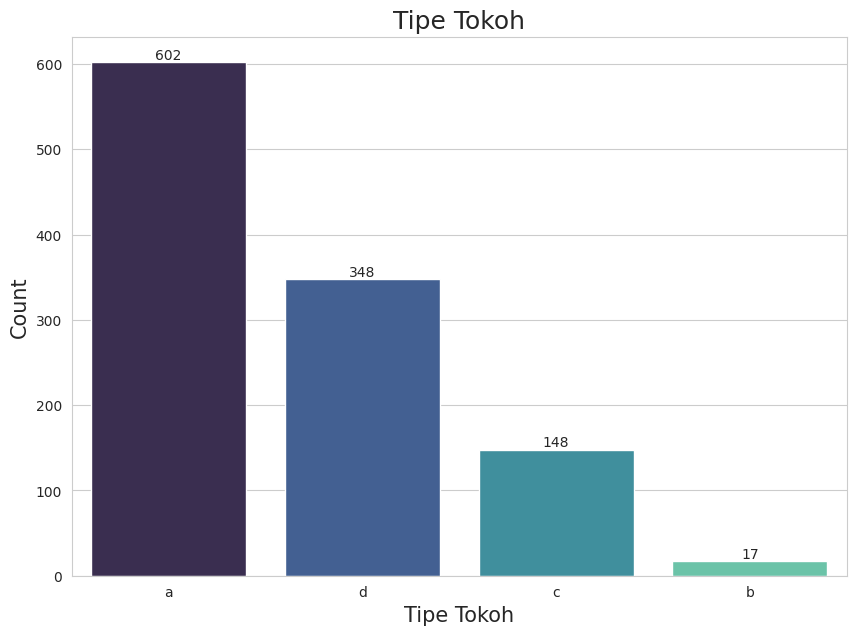

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df_store_analisis,
                   x=df_store_analisis.StoreType,
                   palette='mako',
                   order=df_store_analisis.StoreType.value_counts().index,
                   saturation=0.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Tipe Tokoh', fontsize=18)
plt.xlabel('Tipe Tokoh', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

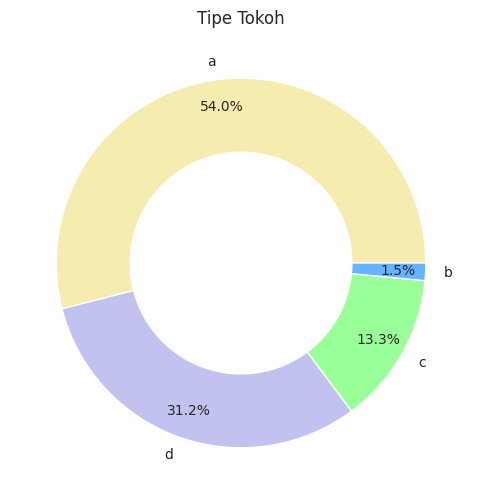

In [ ]:
plt.figure(figsize=(6,6))
tipe_tokoh = df_store_analisis['StoreType'].value_counts()
plt.pie(tipe_tokoh,
        labels=tipe_tokoh.index,
        autopct='%1.1f%%',
        wedgeprops=dict(width=.4),
        pctdistance=0.85,
        colors=['#f7ecb0','#c2c2f0','#99ff99','#66b3ff'])
plt.title('Tipe Tokoh')
plt.show()

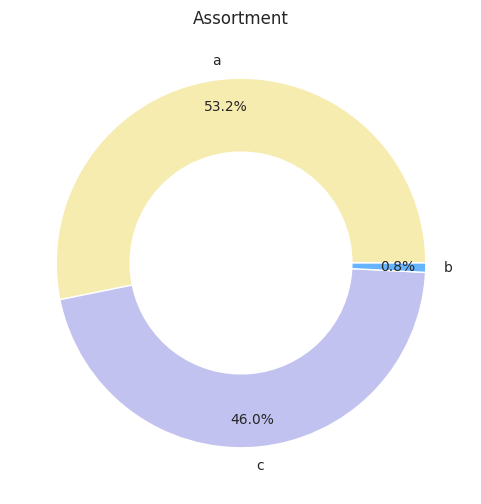

In [ ]:
plt.figure(figsize=(6,6))
tipe_tokoh = df_store_analisis['Assortment'].value_counts()
plt.pie(tipe_tokoh,
        labels=tipe_tokoh.index,
        autopct='%1.1f%%',
        wedgeprops=dict(width=.4),
        pctdistance=0.85,
        colors=['#f7ecb0','#c2c2f0','#66b3ff'])
plt.title('Assortment')
plt.show()

# **Feature Engineering and Data Preparation**

In [ ]:
df_sales_analisis.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Years', 'Month', 'Week'],
      dtype='object')

In [ ]:
df_sales_analisis

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Years,Month,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,4
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,4
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,4
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,4
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [ ]:
df_store_analisis.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
df_store_analisis

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,22,2012,NoPromo
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,22,2012,NoPromo
4,5,a,a,29910.0,4,2015,0,22,2012,NoPromo
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4,2006,0,22,2012,NoPromo
1112,1113,a,c,9260.0,8,2010,0,22,2012,NoPromo
1113,1114,a,c,870.0,8,2010,0,22,2012,NoPromo


In [ ]:
df_analisis_merge.nunique()

,0
DayOfWeek,7
Sales,16195
Customers,1827
Open,2
Promo,2
StateHoliday,4
SchoolHoliday,2
Years,3
Month,12
Week,7


In [ ]:
ranges = [0, 702.5, 2285, 6360, 27650, float('inf')]
label = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']
df_store_analisis['CompetitionDistanceRange'] = pd.cut(df_store_analisis['CompetitionDistance'],
                                                       bins=ranges,
                                                       labels=label,
                                                       include_lowest=True,
                                                       right=False)

In [ ]:
df_analisis_merge = pd.merge(df_sales_analisis, df_store_analisis, on='Store', how='inner')

In [ ]:
df_analisis_merge.duplicated().sum()

0

In [ ]:
df_analisis_merge.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Years', 'Month', 'Week', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionDistanceRange'],
      dtype='object')

In [ ]:
df_analisis_merge.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Years,0


In [ ]:
df_analisis_merge.shape

(996977, 22)

**Data Scaling**

In [ ]:
df_analisis_merge.StateHoliday = df_analisis_merge.StateHoliday.map({'0':0, 'a':1, 'b':2, 'c':3})
df_analisis_merge.Assortment = df_analisis_merge.Assortment.map({'a':0, 'c':1, 'b':2})
df_analisis_merge.CompetitionDistanceRange = df_analisis_merge.CompetitionDistanceRange.map({'Very Close':0, 'Close':1, 'Moderate':2, 'Far':3, 'Very Far':4})
df_analisis_merge.StoreType = df_analisis_merge.StoreType.map({'a':0, 'b':1, 'c':2, 'd':3})
df_analisis_merge.PromoInterval = df_analisis_merge.PromoInterval.map({'NoPromo':0,
                                                         'Jan,Apr,Jul,Oct':1,
                                                         'Feb,May,Aug,Nov':2,
                                                         'Mar,Jun,Sept,Dec':3})

In [ ]:
df_analisis_merge.drop(columns=['Date'], axis=1, inplace=True)

In [ ]:
df_analisis_merge.drop(columns=['CompetitionDistance','Store'], axis=1, inplace=True)

In [ ]:
df_analisis_merge.CompetitionDistanceRange = df_analisis_merge.CompetitionDistanceRange.astype('int32')

In [ ]:
df_analisis_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996977 entries, 0 to 996976
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   DayOfWeek                  996977 non-null  int64
 1   Sales                      996977 non-null  int64
 2   Customers                  996977 non-null  int64
 3   Open                       996977 non-null  int64
 4   Promo                      996977 non-null  int64
 5   StateHoliday               996977 non-null  int64
 6   SchoolHoliday              996977 non-null  int64
 7   Years                      996977 non-null  int32
 8   Month                      996977 non-null  int32
 9   Week                       996977 non-null  int32
 10  StoreType                  996977 non-null  int64
 11  Assortment                 996977 non-null  int64
 12  CompetitionOpenSinceMonth  996977 non-null  int64
 13  CompetitionOpenSinceYear   996977 non-null  int64
 14  Prom

In [ ]:
df_analisis_merge

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Years,Month,Week,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistanceRange
0,5,5263,555,1,1,0,1,2015,7,4,2,0,9,2008,0,22,2012,0,1
1,4,5020,546,1,1,0,1,2015,7,3,2,0,9,2008,0,22,2012,0,1
2,3,4782,523,1,1,0,1,2015,7,2,2,0,9,2008,0,22,2012,0,1
3,2,5011,560,1,1,0,1,2015,7,1,2,0,9,2008,0,22,2012,0,1
4,1,6102,612,1,1,0,1,2015,7,0,2,0,9,2008,0,22,2012,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996972,7,6838,1520,1,0,0,0,2014,10,6,1,2,10,1999,0,22,2012,0,1
996973,2,6985,1365,1,0,0,1,2013,12,1,1,2,10,1999,0,22,2012,0,1
996974,3,12655,1756,1,0,0,1,2014,12,2,1,1,8,2010,0,22,2012,0,1
996975,2,11024,1663,1,0,0,1,2013,12,1,1,1,8,2010,0,22,2012,0,1


**Data Spliting**

In [ ]:
input_features = ['DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday','Years','Month','Week',
                  'StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                  'Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionDistanceRange']
target_feature = ['Sales']

In [ ]:
x = df_analisis_merge[input_features]
y = df_analisis_merge[target_feature]

In [ ]:
# melakukan split 60% data yang dilatih dan 60% data yang di remeaning
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.6, random_state=30)

# melakukan split 60% data remaining ke 30% validasi dan 30% di uji
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=30)

x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

**Feature Selection**

In [ ]:
corr_matrix = x_train.corr()

fig = go.Figure(data=go.Heatmap(
                    x=corr_matrix.columns,
                    y=corr_matrix.columns,
                    z=corr_matrix.values,
                    colorscale='portland',
                    zmin=-1,
                    zmax=1))

for i in range(len(corr_matrix)):
  for j in range (len(corr_matrix)):
    fig.add_annotation(
        x=corr_matrix.columns[j],
        y=corr_matrix.columns[i],
        text=str(round(corr_matrix.iloc[i,j], 2)),
        showarrow=False,
        font=dict(color='white' if corr_matrix.iloc[i,j] < 0.5 else 'black'))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_nticks=36,
    width=1000,
    height=700)

fig.show()

**Menghilangkan Fitur yang Sesuai dengan Korelasi Tinggi**

In [ ]:
x_train.drop(columns=['DayOfWeek','Week'], axis=1, inplace=True)
x_val.drop(columns=['DayOfWeek','Week'], axis=1, inplace=True)
x_test.drop(columns=['DayOfWeek','Week'], axis=1, inplace=True)

In [ ]:
x_train.shape

(398790, 16)

In [ ]:
x_val.shape

(418730, 16)

In [ ]:
x_test.shape

(179457, 16)

**Build Model Training**

**Linear Regression Algorithm**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Training Data**

In [ ]:
model_lr = lr
y_train_pred_lr = model_lr.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred_lr))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print('Coefficient Correlation (R2-Score):', r2_score(y_train, y_train_pred_lr))

Mean Absolute Error: 841.4118513062768
Mean Squared Error: 1341867.0934432012
Root Mean Squared Error: 1158.3898710896954
Coefficient Correlation (R2-Score): 0.8897752150898619


**Validation Data**

In [ ]:
y_val_pred_lr = model_lr.predict(x_val)

print('Mean Absolute Error:', mean_absolute_error(y_val, y_val_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_val, y_val_pred_lr))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_val, y_val_pred_lr)))
print('Coefficient Correlation (R2-score):', r2_score(y_val, y_val_pred_lr))

Mean Absolute Error: 841.6276854105001
Mean Squared Error: 1342610.559657823
Root Mean Squared Error: 1158.710731657312
Coefficient Correlation (R2-score): 0.8901482565222221


**Testing Data**

In [ ]:
y_test_pred_lr = model_lr.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred_lr))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_test_pred_lr)))
print('Coefficient Correlation (R2-score):', r2_score(y_test, y_test_pred_lr))

Mean Absolute Error: 842.2264463669096
Mean Squared Error: 1352839.3544300622
Root Mean Squared Error: 1163.1162256756897
Coefficient Correlation (R2-score): 0.8887681258045881


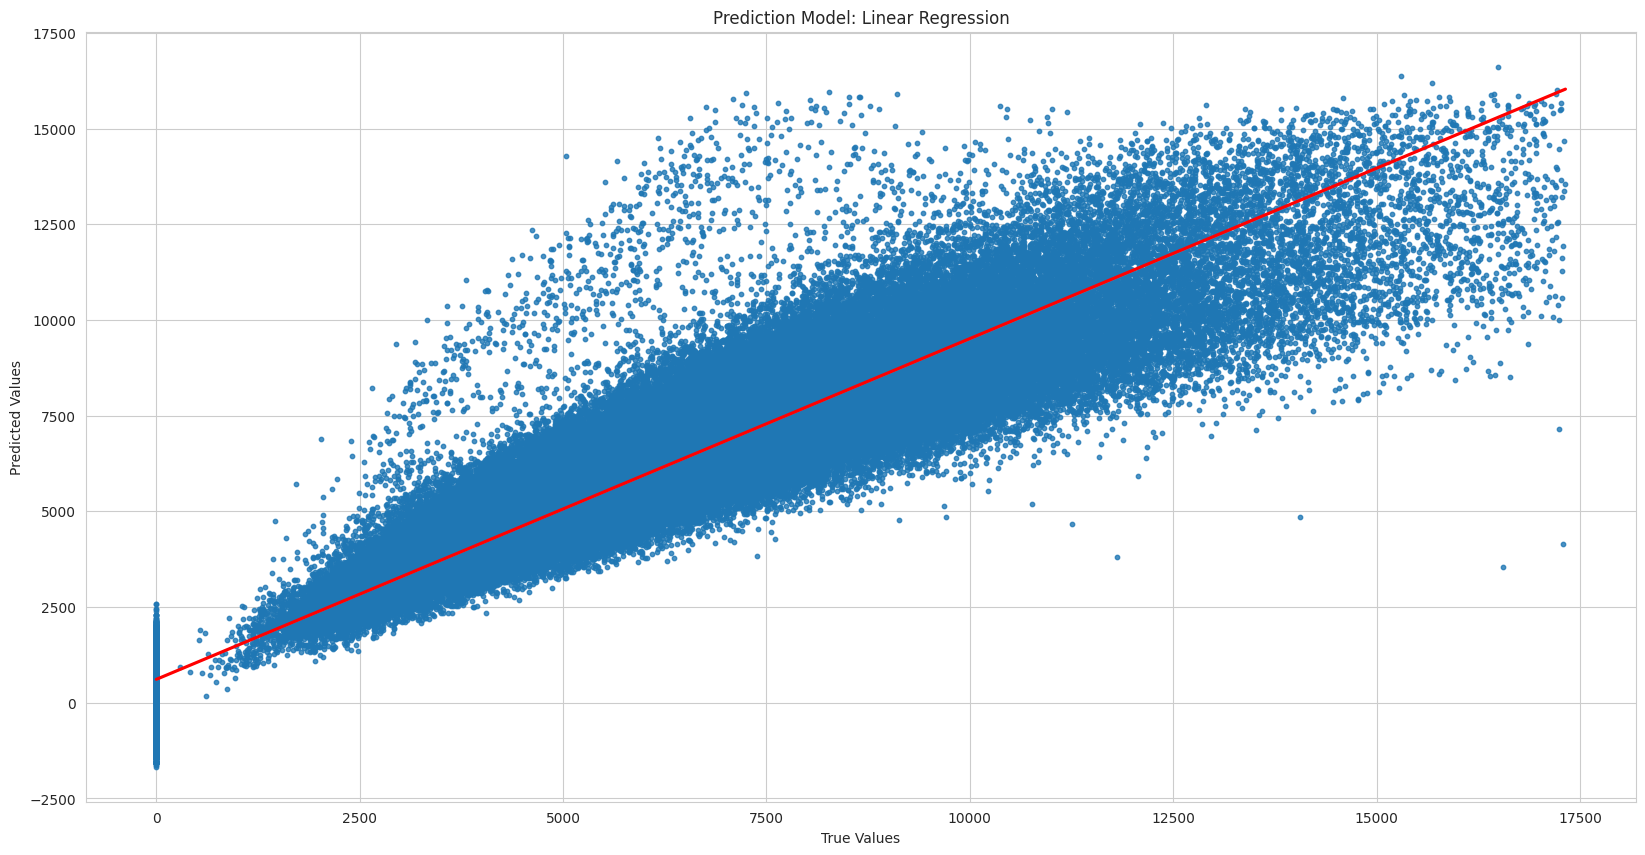

In [ ]:
y_test = np.array(y_test).flatten()
y_test_pred_lr = np.array(y_test_pred_lr).flatten()
data = {'true': y_test, 'pred': y_test_pred_lr}
results = pd.DataFrame(data)

plt.figure(figsize=(20,10))
sns.regplot(x='true',
            y='pred',
            data=results,
            scatter_kws={'s':10},
            line_kws={'color':'red'})
plt.title('Prediction Model: Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

**Decision Tree**

In [ ]:
dt = DecisionTreeRegressor(max_depth=10, random_state=30)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=30)

**Training Data**

In [ ]:
model_dt = dt
y_train_pred_dt = model_dt.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred_dt))
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred_dt))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_train, y_train_pred_dt)))
print('Coefficient Correlation (R2-Score):', r2_score(y_train, y_train_pred_dt))

Mean Absolute Error: 635.0824800098862
Mean Squared Error: 879346.1568032954
Root Mean Squared Error: 937.7345876117055
Coefficient Correlation (R2-Score): 0.9277680021599677


**Validation Data**

In [ ]:
y_val_pred_dt = model_dt.predict(x_val)
print('Mean Absolute Error:', mean_absolute_error(y_val, y_val_pred_dt))
print('Mean Squared Error:', mean_squared_error(y_val, y_val_pred_dt))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_val, y_val_pred_dt)))
print('Coefficient Correlation (R2-Score):', r2_score(y_val, y_val_pred_dt))

Mean Absolute Error: 640.7724734877025
Mean Squared Error: 897445.3953978933
Root Mean Squared Error: 947.33594642972
Coefficient Correlation (R2-Score): 0.9265714539101436


**Testing Data**

In [ ]:
y_test_pred_dt = model_dt.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred_dt))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred_dt))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_test_pred_dt)))
print('Coefficient Correlation (R2-Score):', r2_score(y_test, y_test_pred_dt))

Mean Absolute Error: 642.4622522059306
Mean Squared Error: 900522.3043782001
Root Mean Squared Error: 948.9585367012618
Coefficient Correlation (R2-Score): 0.9259581092590571


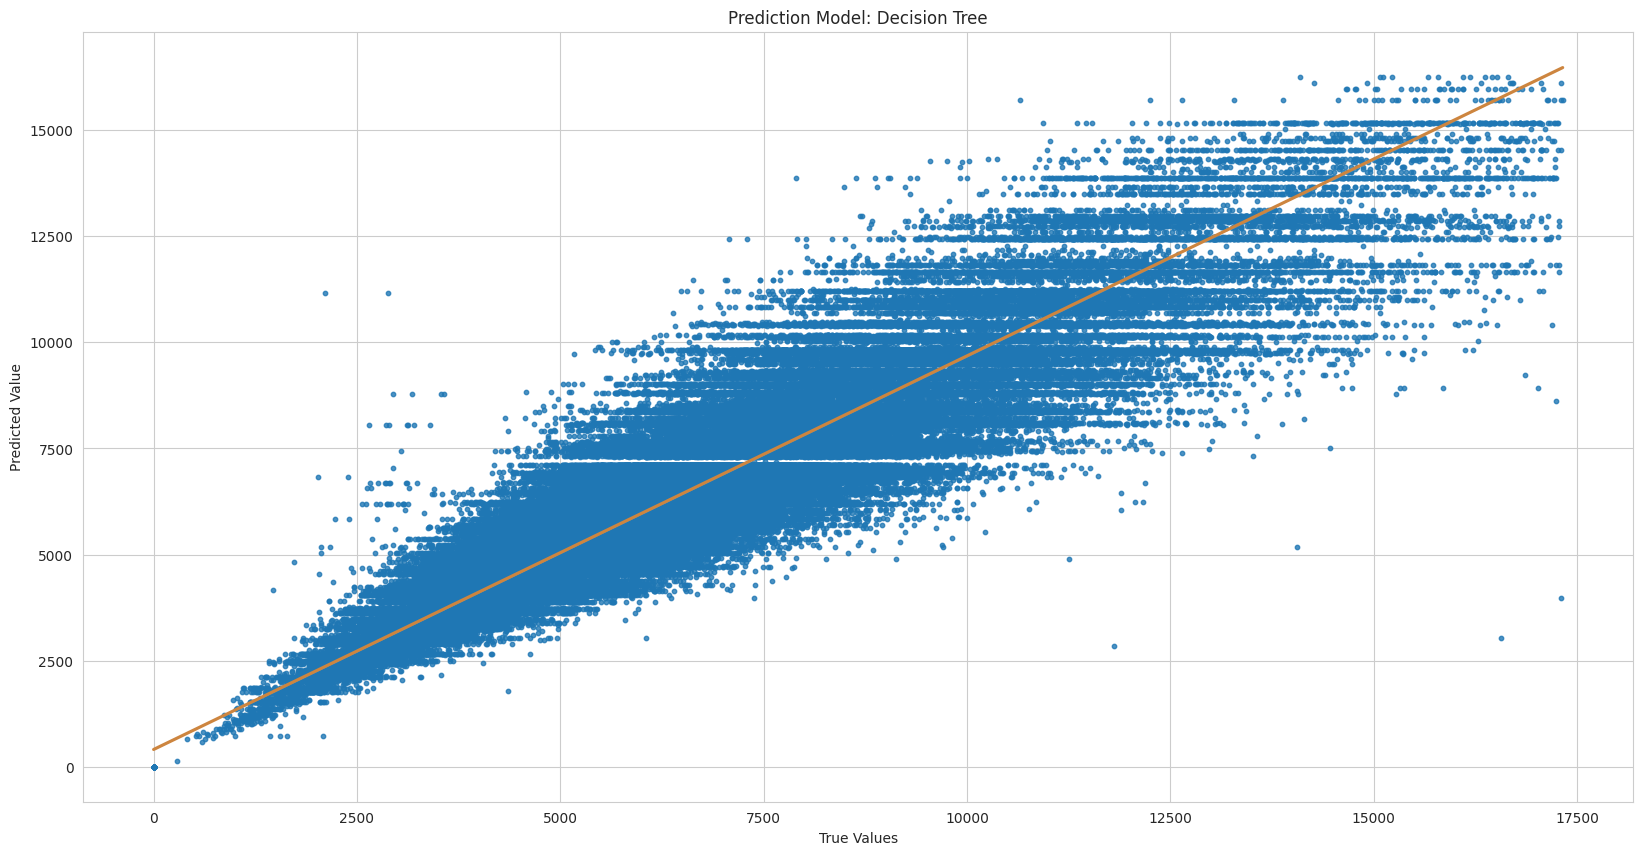

In [ ]:
y_test = np.array(y_test).flatten()
y_test_pred_dt = np.array(y_test_pred_dt).flatten()
data = {'true':y_test, 'pred':y_test_pred_dt}
results = pd.DataFrame(data)

plt.figure(figsize=(20,10))
sns.regplot(x='true',
            y='pred',
            data=results,
            scatter_kws={'s':10},
            line_kws={'color':'peru'})
plt.title('Prediction Model: Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Value')
plt.show()

**Random Forest Algorithm**

In [ ]:
rf = RandomForestRegressor(n_estimators=450,
                           max_depth=12,
                           min_samples_leaf=2,
                           min_samples_split=12,
                           random_state=30)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=12,
                      n_estimators=450, random_state=30)

**Training Data**

In [ ]:
model_rf = rf
y_train_pred_rf = model_rf.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred_rf))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print('Coefficient Correlation (R2-Score):', r2_score(y_train, y_train_pred_rf))

Mean Absolute Error: 540.2253046849328
Mean Squared Error: 648282.1696906616
Root Mean Squared Error: 805.1597168827199
Coefficient Correlation (R2-Score): 0.946748256169041


**Validation Data**

In [ ]:
y_val_pred_rf = model_rf.predict(x_val)

print('Mean Absolute Error:', mean_absolute_error(y_val, y_val_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_val, y_val_pred_rf))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_val, y_val_pred_rf)))
print('Coefficient Correlation (R2-Score):', r2_score(y_val, y_val_pred_rf))

Mean Absolute Error: 551.4908673097464
Mean Squared Error: 676609.1734785724
Root Mean Squared Error: 822.5625650846094
Coefficient Correlation (R2-Score): 0.9446401662604067


**Testing Data**

In [ ]:
y_test_pred_rf = model_rf.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred_rf))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print('Coefficient Correlation (R2-Score):', r2_score(y_test, y_test_pred_rf))

Mean Absolute Error: 553.3401019631801
Mean Squared Error: 681016.8806346322
Root Mean Squared Error: 825.2374692381776
Coefficient Correlation (R2-Score): 0.9440060760032988


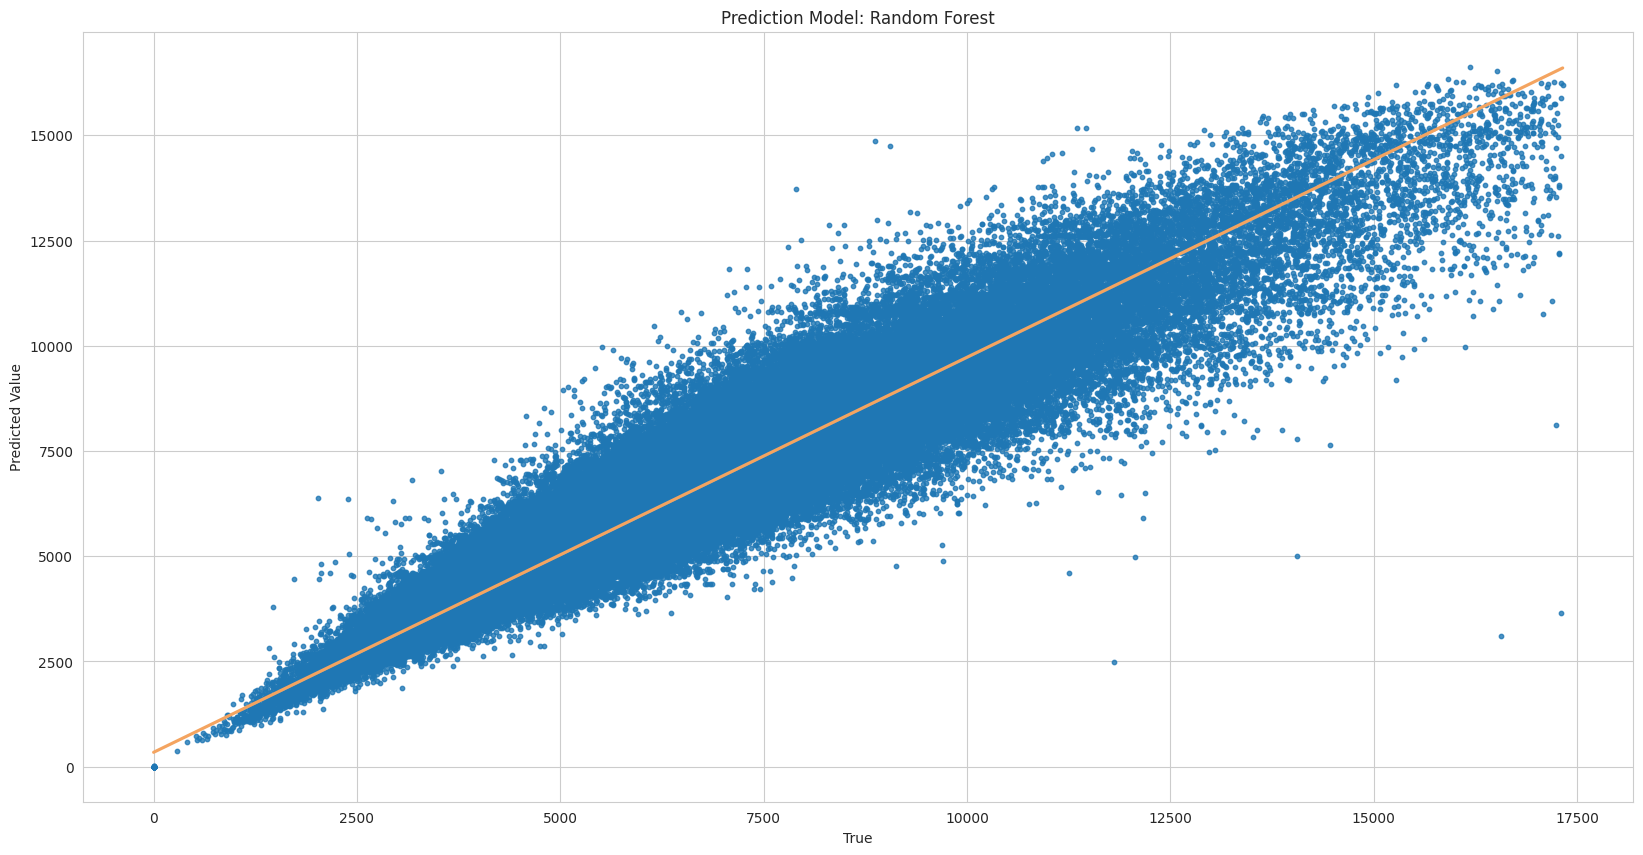

In [ ]:
y_test = np.array(y_test).flatten()
y_test_pred_rf = np.array(y_test_pred_rf).flatten()

data = {'true':y_test, 'pred':y_test_pred_rf}
results = pd.DataFrame(data)

plt.figure(figsize=(20,10))
sns.regplot(x='true',
            y='pred',
            data=results,
            scatter_kws={'s':10},
            line_kws={'color':'sandybrown'})
plt.title('Prediction Model: Random Forest')
plt.xlabel('True')
plt.ylabel('Predicted Value')
plt.show()

**GradientBoosting Algorithm**

In [ ]:
gb = GradientBoostingRegressor(n_estimators=500,
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=5,
                               learning_rate=0.1,
                               random_state=30)
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=5,
                          min_samples_split=10, n_estimators=500,
                          random_state=30)

**Training Data**

In [ ]:
model_gb = gb
y_train_pred_gb = model_gb.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred_gb))
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred_gb))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_train, y_train_pred_gb)))
print('Coefficient Correlation (R2-Score):', r2_score(y_train, y_train_pred_gb))

Mean Absolute Error: 276.1242407670331
Mean Squared Error: 184150.9779567051
Root Mean Squared Error: 429.1281602932917
Coefficient Correlation (R2-Score): 0.9848733141788393


**Validation Data**

In [ ]:
y_val_pred_gb = model_gb.predict(x_val)

print('Mean Absolute Error:', mean_absolute_error(y_val, y_val_pred_gb))
print('Mean Squared Error:', mean_squared_error(y_val, y_val_pred_gb))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_val, y_val_pred_gb)))
print('Coefficient Correlation (R2-Score):', r2_score(y_val, y_val_pred_gb))

Mean Absolute Error: 339.877386006419
Mean Squared Error: 278894.0166588525
Root Mean Squared Error: 528.1041721657315
Coefficient Correlation (R2-Score): 0.9771810271004396


**Testing Data**

In [ ]:
y_test_pred_gb = model_gb.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred_gb))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred_gb))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_test_pred_gb)))
print('Coefficient Correlation (R2-Score):', r2_score(y_test, y_test_pred_gb))

Mean Absolute Error: 341.44199738859635
Mean Squared Error: 282917.66617265786
Root Mean Squared Error: 531.9000528037743
Coefficient Correlation (R2-Score): 0.9767382120069722


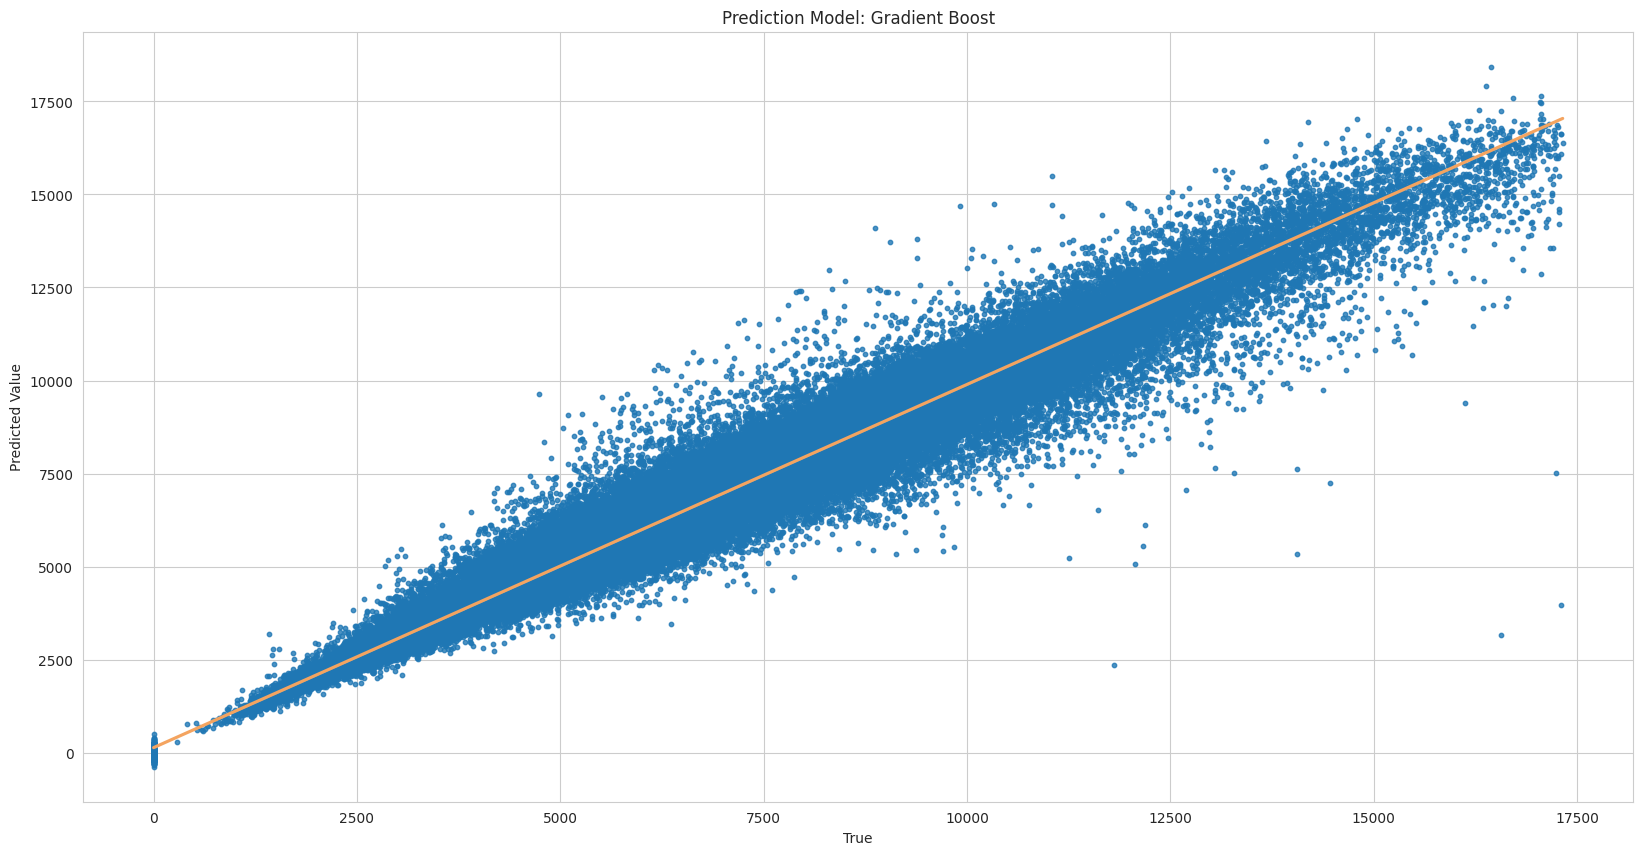

In [ ]:
y_test = np.array(y_test).flatten()
y_test_pred_gb = np.array(y_test_pred_gb).flatten()

data = {'true':y_test, 'pred':y_test_pred_gb}
results = pd.DataFrame(data)

plt.figure(figsize=(20,10))
sns.regplot(x='true',
            y='pred',
            data=results,
            scatter_kws={'s':10},
            line_kws={'color':'sandybrown'})
plt.title('Prediction Model: Gradient Boost')
plt.xlabel('True')
plt.ylabel('Predicted Value')
plt.show()

**AdaBoost Algorithm**

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth=10)
ab = AdaBoostRegressor(base_estimator=base_estimator,
                       n_estimators=400,
                       learning_rate=0.1,
                       random_state=30)
ab.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=400, random_state=30)

**Training Data**

In [ ]:
model_ab = ab
y_train_pred_ab = model_ab.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred_ab))
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred_ab))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_train, y_train_pred_ab)))
print('Coefficient Correlation (R2-Score):', r2_score(y_train, y_train_pred_ab))

Mean Absolute Error: 595.4089248484329
Mean Squared Error: 679811.9657060708
Root Mean Squared Error: 824.5071047032104
Coefficient Correlation (R2-Score): 0.944158308922372


**Validation Data**

In [ ]:
y_val_pred_ab = model_ab.predict(x_val)

print('Mean Absolute Error:', mean_absolute_error(y_val, y_val_pred_ab))
print('Mean Squared Error:', mean_squared_error(y_val, y_val_pred_ab))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_val, y_val_pred_ab)))
print('Coefficient Correlation (R2-Score):', r2_score(y_val, y_val_pred_ab))

Mean Absolute Error: 603.3991529466205
Mean Squared Error: 715937.7974350521
Root Mean Squared Error: 846.1310758003467
Coefficient Correlation (R2-Score): 0.9414223173621362


**Testing Data**

In [ ]:
y_test_pred_ab = model_ab.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred_ab))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred_ab))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_test_pred_ab)))
print('Coefficient Correlation (R2-Score):', r2_score(y_test, y_test_pred_ab))

Mean Absolute Error: 605.6677953492721
Mean Squared Error: 721913.4273019478
Root Mean Squared Error: 849.6548871759333
Coefficient Correlation (R2-Score): 0.9406435189346939


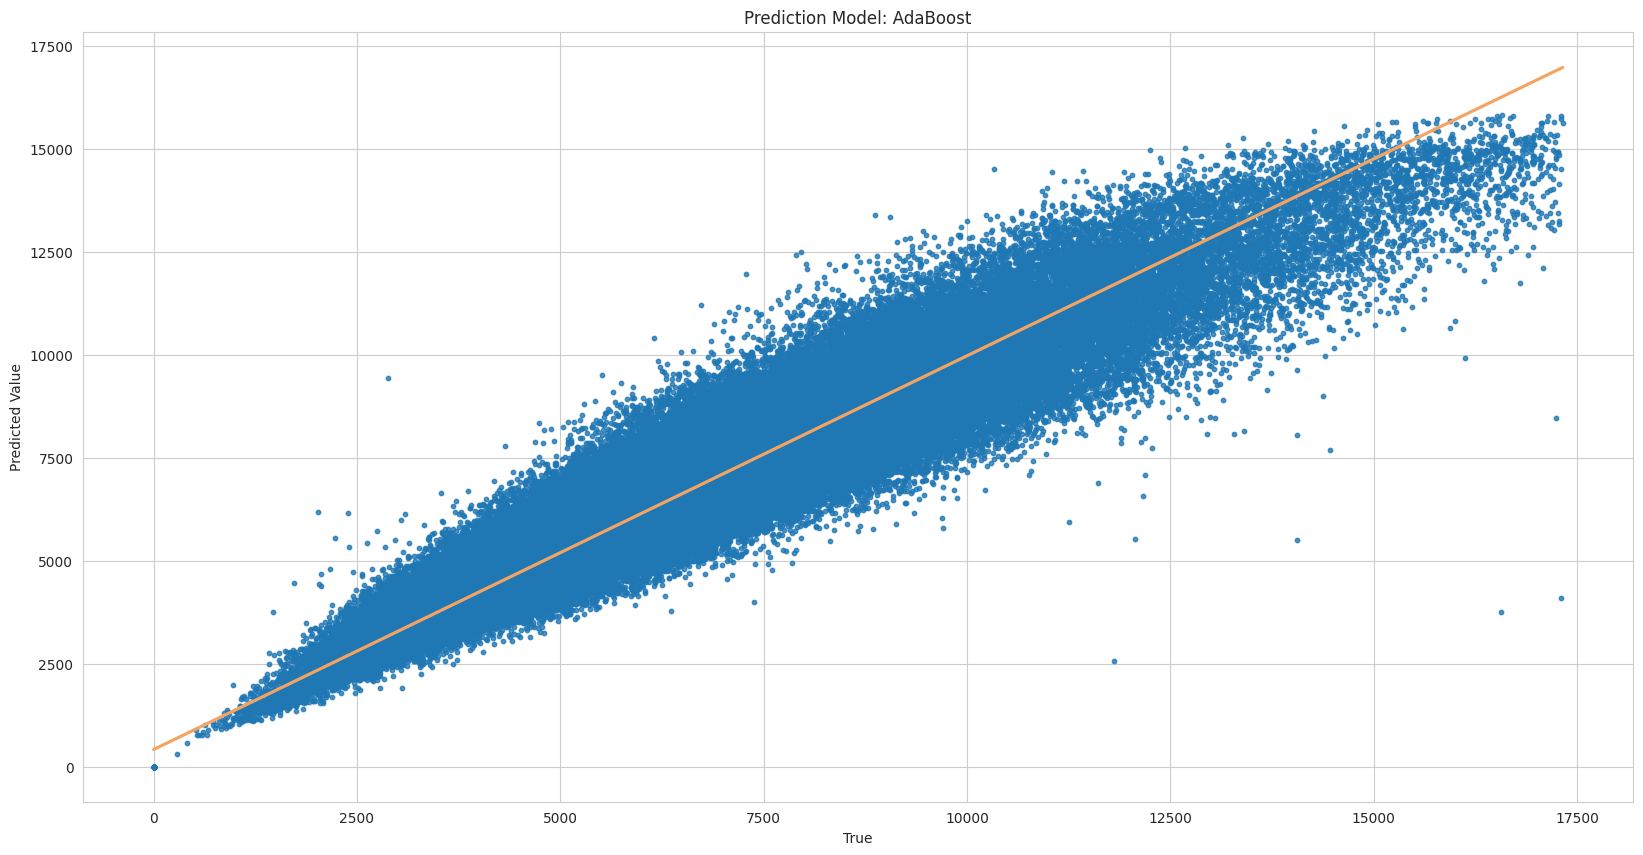

In [ ]:
y_test = np.array(y_test).flatten()
y_test_pred_gb = np.array(y_test_pred_ab).flatten()

data = {'true':y_test, 'pred':y_test_pred_ab}
results = pd.DataFrame(data)

plt.figure(figsize=(20,10))
sns.regplot(x='true',
            y='pred',
            data=results,
            scatter_kws={'s':10},
            line_kws={'color':'sandybrown'})
plt.title('Prediction Model: AdaBoost')
plt.xlabel('True')
plt.ylabel('Predicted Value')
plt.show()

**XGBoost Algorithm**

In [ ]:
xb = XGBRegressor(objective='reg:squarederror',
                  n_estimators=15,
                  learning_rate=0.1,
                  max_depth=10,
                  n_jobs=3,
                  random_state=10)
xb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=3,
             num_parallel_tree=None, random_state=30, ...)

**Training Data**

In [ ]:
model_xb = xb
y_train_pred_xb = model_xb.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred_xb))
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred_xb))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_train, y_train_pred_xb)))
print('Coefficient Correlation (R2-Score):', r2_score(y_train, y_train_pred_xb))

Mean Absolute Error: 277.65954954220626
Mean Squared Error: 186475.84798971258
Root Mean Squared Error: 431.82849372142243
Coefficient Correlation (R2-Score): 0.9846823427327218


**Validation Data**

In [ ]:
y_val_pred_xb = model_xb.predict(x_val)

print('Mean Absolute Error:', mean_absolute_error(y_val, y_val_pred_xb))
print('Mean Squared Error:', mean_squared_error(y_val, y_val_pred_xb))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_val, y_val_pred_xb)))
print('Coefficient Correlation (R2-Score):', r2_score(y_val, y_val_pred_xb))

Mean Absolute Error: 348.5694129050484
Mean Squared Error: 289748.54448852275
Root Mean Squared Error: 538.2829595004125
Coefficient Correlation (R2-Score): 0.9762929149087546


**Testing Data**

In [ ]:
y_test_pred_xb = model_xb.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred_xb))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred_xb))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_test_pred_xb)))
print('Coefficient Correlation (R2-Score):', r2_score(y_test, y_test_pred_xb))

Mean Absolute Error: 349.5145681382705
Mean Squared Error: 293190.093854564
Root Mean Squared Error: 541.4703074542167
Coefficient Correlation (R2-Score): 0.9758936022017847


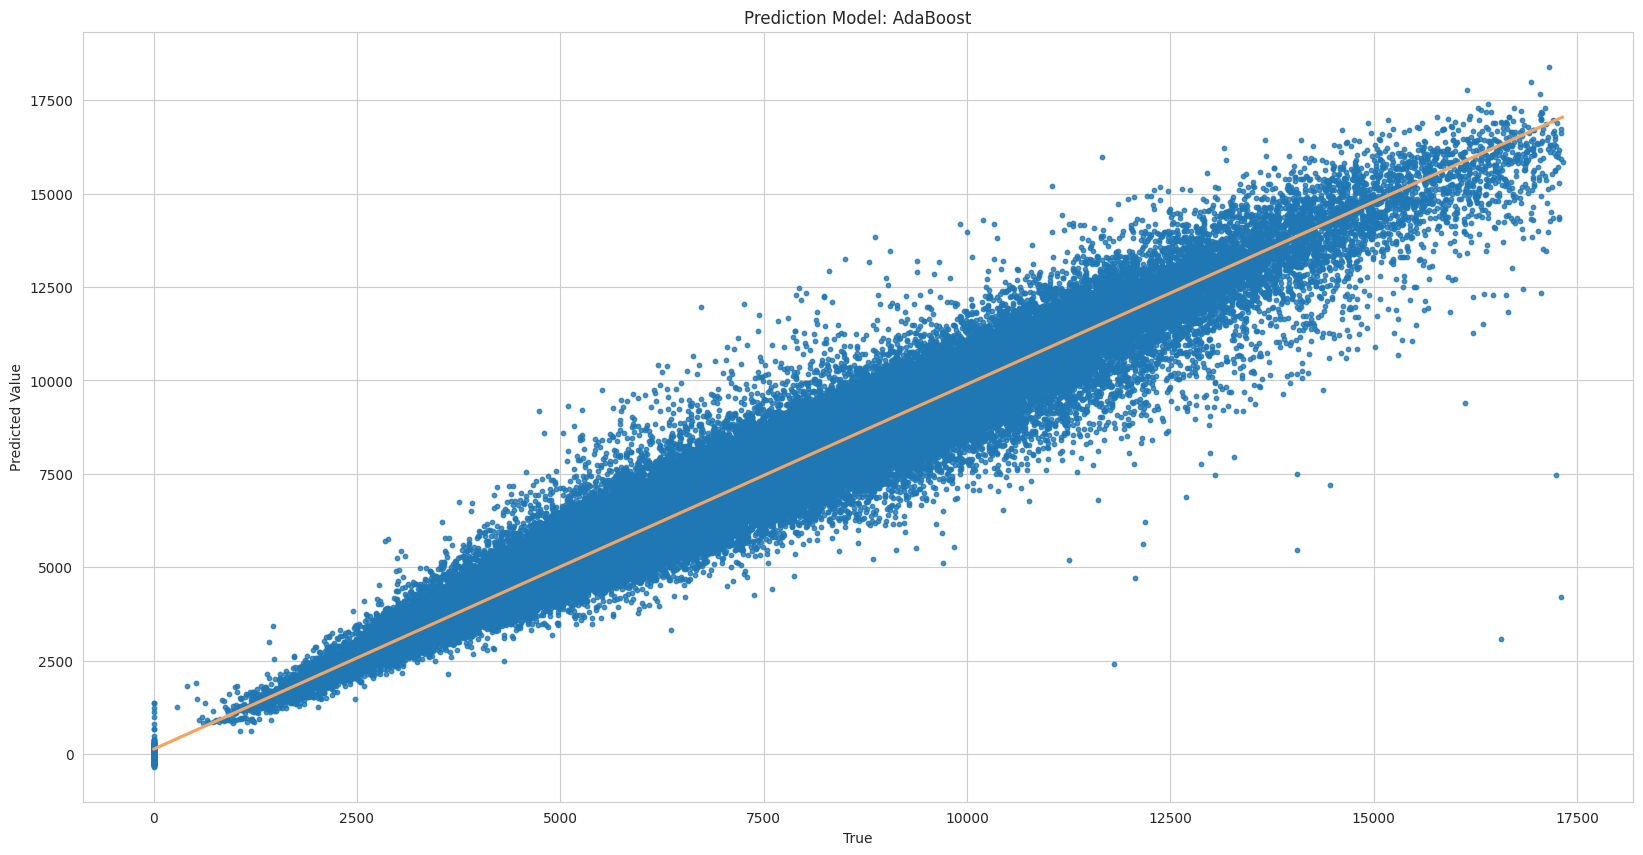

In [ ]:
y_test = np.array(y_test).flatten()
y_test_pred_xb = np.array(y_test_pred_xb).flatten()

data = {'true':y_test, 'pred':y_test_pred_xb}
results = pd.DataFrame(data)

plt.figure(figsize=(20,10))
sns.regplot(x='true',
            y='pred',
            data=results,
            scatter_kws={'s':10},
            line_kws={'color':'sandybrown'})
plt.title('Prediction Model: AdaBoost')
plt.xlabel('True')
plt.ylabel('Predicted Value')
plt.show()

**Report Evaluation**

In [ ]:
Model_evaluation_scores = {
    'Model': [
        'LinearRegression',
        'DecisionTreeRegressor',
        'RandomForestRegressor',
        'GradientBoostingRegressor',
        'AdaBoostRegressor',
        'XGBoostRegressor'],

    'R² Score': [
        0.8887681258045881,
        0.9259581092590571,
        0.9440060760032988,
        0.9767382120069722,
        0.9406435189346939,
        0.9758936022017847]}

result = pd.DataFrame(Model_evaluation_scores)
result.index = result.index + 1
result

,Model,R² Score
1,LinearRegression,0.888768
2,DecisionTreeRegressor,0.925958
3,RandomForestRegressor,0.944006
4,GradientBoostingRegressor,0.976738
5,AdaBoostRegressor,0.940644
6,XGBoostRegressor,0.975894
